In [ ]:
##  Person applies to loans for Education or loan intent...  

# -- This is features of datasets
# Person Age :- age of person 
# Person Gender:- Male or Female 
# Person Education:-  Associate, Bachelor, Doctorate, High School & Master 
# Person Income:- Monthly Income 
# Person Experience  eg --  2, 3, 5, 10 
# Person Home Ownership  -- MORTGAGE, OTHER, OWN, RENT 
# Person Loan Amount -- 
# Loan intent ---  DEBT CONSOLIDATION, EDUCATION  , HOME IMPROVEMENT, MEDICAL  , PERSONAL, VENTURE 
# Loan intent rate -- 
# Loan Percentage Income -- 
# cb person cred hist length -
# Credit score -- 
# previous loan defaults on file -- 
# loan Status -- 0 / 1 ( Approved or Not ) -> our Target

 # Load Necessary Libraries:-

In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statistics as s
import joblib

# Load Kaggle Dataset:- 

In [2]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# size of dataset:- 
loan_df.shape,loan_df.size

((45000, 14), 630000)

In [4]:
loan_df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
loan_df.isnull().sum()/loan_df.shape[0] * 100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

## info About the DataSet:-

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
loan_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## Remove Unnecessary Feature:- 

In [9]:
new_df = loan_df.copy()
new_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [10]:
new_df.drop(['previous_loan_defaults_on_file'],inplace=True,axis=1)
new_df.drop(['credit_score'],inplace=True,axis=1)
new_df.drop(['cb_person_cred_hist_length'],inplace=True,axis=1)
# new_df.drop(['loan_int_rate'],inplace=True,axis=1)
new_df.drop(['loan_percent_income'],inplace=True,axis=1)
new_df.drop(['person_gender'],inplace=True,axis=1)
#new_df.drop(['person_age'],inplace=True,axis=1)

In [11]:
new_df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_status
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,1
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,1
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,1
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,1


In [12]:
new_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,1.000000


<Axes: >

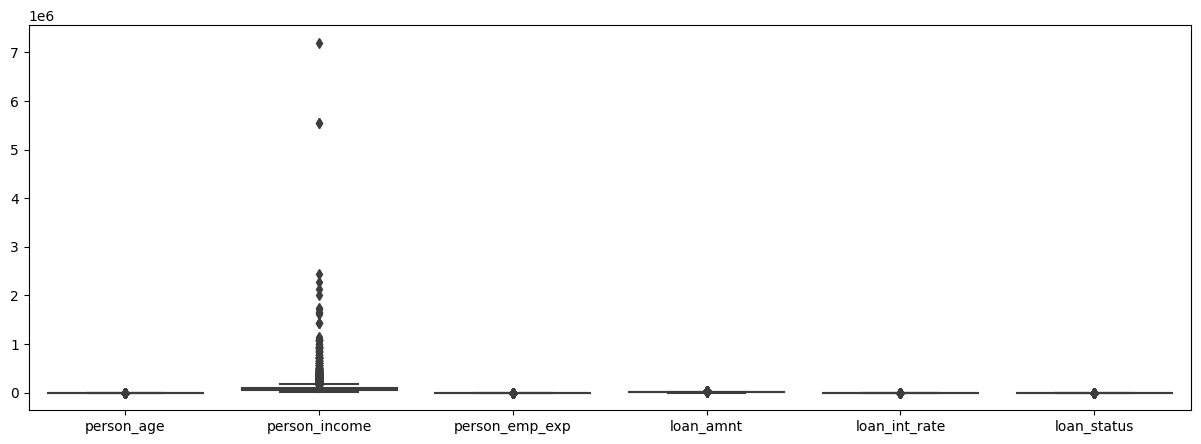

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(new_df)

<Axes: >

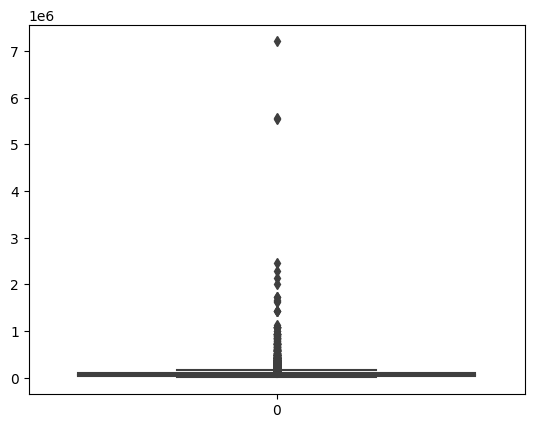

In [25]:
sns.boxplot(new_df['person_income'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15844\2231739162.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['person_income'])
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='person_income', ylabel='Density'>

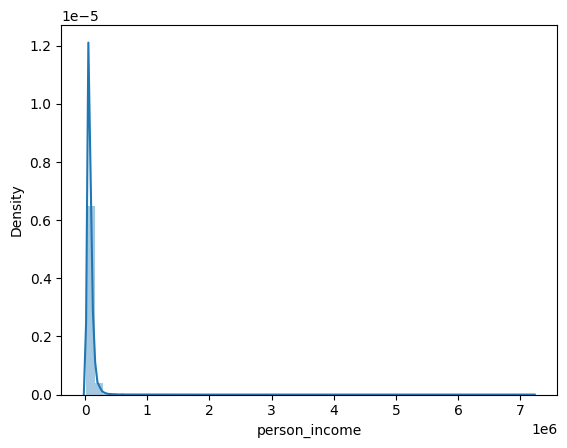

In [26]:
sns.distplot(new_df['person_income'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_19952\4114218599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['loan_amnt'])
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan_amnt', ylabel='Density'>

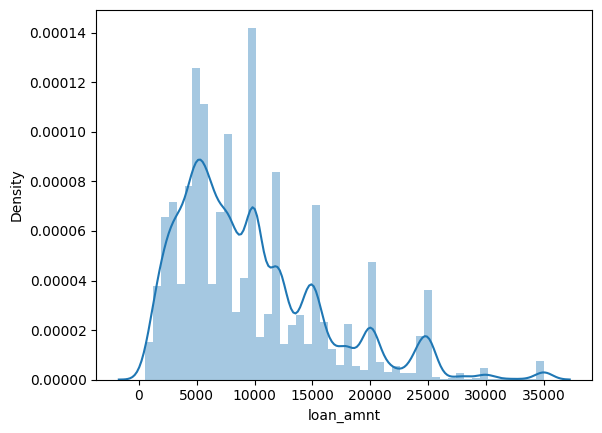

In [16]:
sns.distplot(new_df['loan_amnt'])

<Axes: >

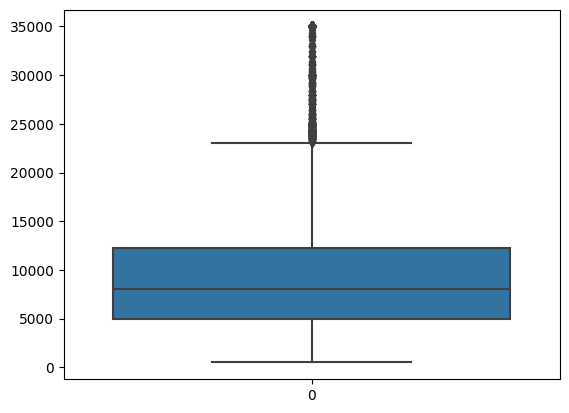

In [17]:
sns.boxplot(new_df['loan_amnt'])

<Axes: >

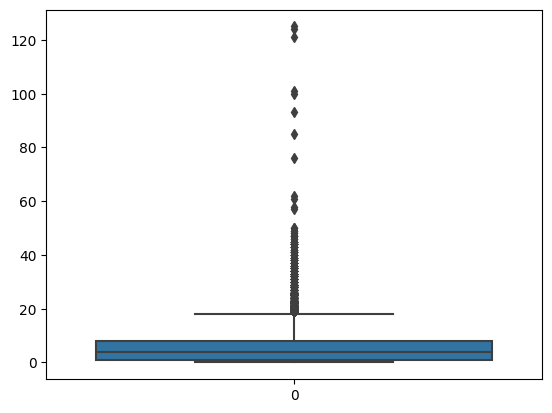

In [18]:
sns.boxplot(new_df['person_emp_exp'])

<Axes: >

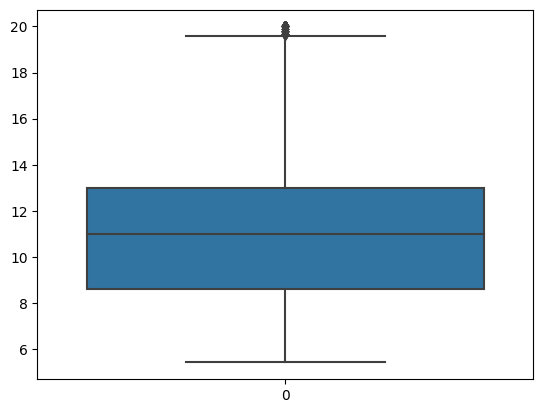

In [19]:
sns.boxplot(new_df['loan_int_rate'])

In [14]:
new_df['person_age'].max(),new_df['person_age'].min()

(144.0, 20.0)

In [15]:
# 1. IQR Method (Box Plot Method)
Q1 = np.percentile(new_df['person_age'], 25)
Q3 = np.percentile(new_df['person_age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(15.0, 39.0)

In [16]:
new_df = new_df[(new_df['person_age']>=lower_bound) & (new_df['person_age'] <= upper_bound)]

In [17]:
new_df['person_income'].min()

8000.0

In [18]:
# 1. IQR Method (Box Plot Method)
Q1 = np.percentile(new_df['person_income'], 25)
Q3 = np.percentile(new_df['person_income'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(-24891.25, 166756.75)

In [19]:
new_df = new_df[(new_df['person_income'] >= lower_bound) & (new_df['person_income'] <= upper_bound)]

In [20]:
# 1. IQR Method (Box Plot Method)
Q1 = np.percentile(new_df['person_emp_exp'], 25)
Q3 = np.percentile(new_df['person_emp_exp'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(-8.0, 16.0)

In [21]:
# mean = np.mean(new_df['person_age'])
# std = np.std(new_df['person_age'])
# z_score = 2 # 3
# # z_score = x-mean/std
# lower_bound = mean - z_score * std
# upper_bound = mean + z_score * std

# lower_bound,upper_bound

In [22]:
new_df = new_df[(new_df['person_emp_exp'] >= lower_bound) &(new_df['person_emp_exp'] <= upper_bound)]

new_df.head()


,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_status
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,1
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,1
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,1
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,1


In [23]:
new_df.shape,new_df.size

((40301, 9), 362709)

In [24]:
loan_df.shape,loan_df.size

((45000, 14), 630000)

<Axes: >

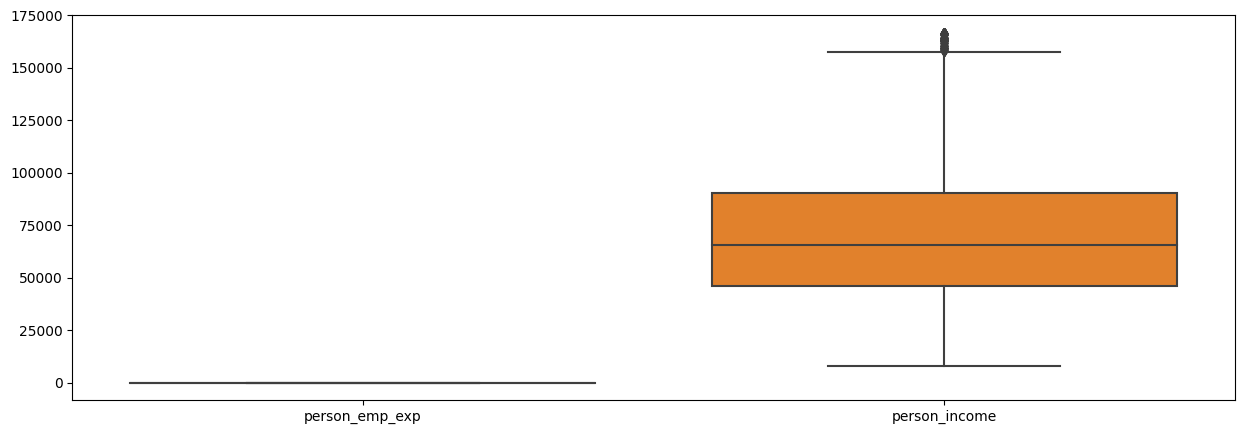

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(new_df[['person_emp_exp','person_income']]) # 'person_age'

<Axes: >

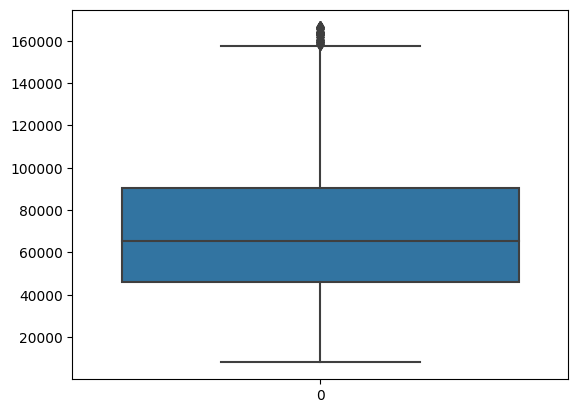

In [26]:
sns.boxplot(new_df['person_income'])

## Feature Extraction :- 

In [27]:
new_df.loan_intent.value_counts()

loan_intent
EDUCATION            8371
MEDICAL              7739
VENTURE              7009
PERSONAL             6663
DEBTCONSOLIDATION    6382
HOMEIMPROVEMENT      4137
Name: count, dtype: int64

In [28]:
#new_df['person_gender'] = pd.Categorical(new_df['person_gender']).codes # Male - 1 or Female - 0

new_df['person_education'] = pd.Categorical(new_df['person_education']).codes
# Associate - 0, Bachelor - 1,Doctorate - 2 , High School - 3 , Master - 4 

new_df['person_home_ownership'] = pd.Categorical(new_df['person_home_ownership']).codes
# MORTGAGE - 0 , OTHER - 1 , OWN - 2, RENT - 3 

new_df['loan_intent'] = pd.Categorical(new_df['loan_intent']).codes
# DEBTCONSOLIDATION - 0 , EDUCATION - 1 , HOMEIMPROVEMENT - 2 , MEDICAL - 3 , PERSONAL - 4 , VENTURE - 5

#new_df['previous_loan_defaults_on_file'] = pd.Categorical(new_df['previous_loan_defaults_on_file']).codes 

In [29]:
new_df.loan_intent.value_counts()

loan_intent
1    8371
3    7739
5    7009
4    6663
0    6382
2    4137
Name: count, dtype: int64

<Axes: >

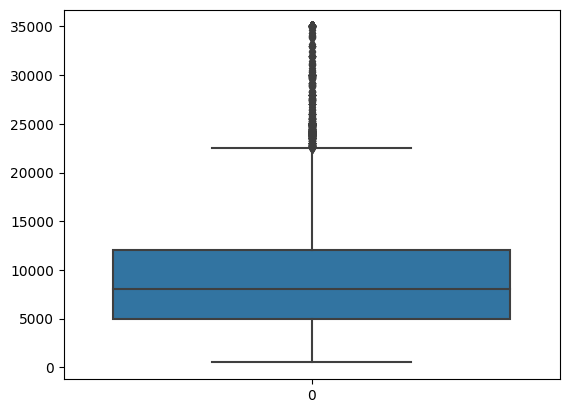

In [30]:
sns.boxplot(new_df['loan_amnt'])

In [31]:
# 1. IQR Method (Box Plot Method)
Q1 = np.percentile(new_df['loan_amnt'], 25)
Q3 = np.percentile(new_df['loan_amnt'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(-5500.0, 22500.0)

In [32]:
new_df = new_df[(new_df['loan_amnt']>=lower_bound) & (new_df['loan_amnt'] <= upper_bound)]

In [33]:
loan_df.shape,loan_df.size

((45000, 14), 630000)

In [34]:
new_df.shape,new_df.size

((38544, 9), 346896)

In [35]:
new_df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_status
1,21.0,3,12282.0,0,2,1000.0,1,11.14,0
2,25.0,3,12438.0,3,0,5500.0,3,12.87,1
5,21.0,3,12951.0,0,2,2500.0,5,7.14,1
9,21.0,3,12739.0,0,2,1600.0,5,14.74,1
11,21.0,0,13113.0,0,2,4500.0,2,8.63,1


In [172]:
## Testing Calculation : - 
(35000 * 16.02 )/ 100

5607.0

<Axes: >

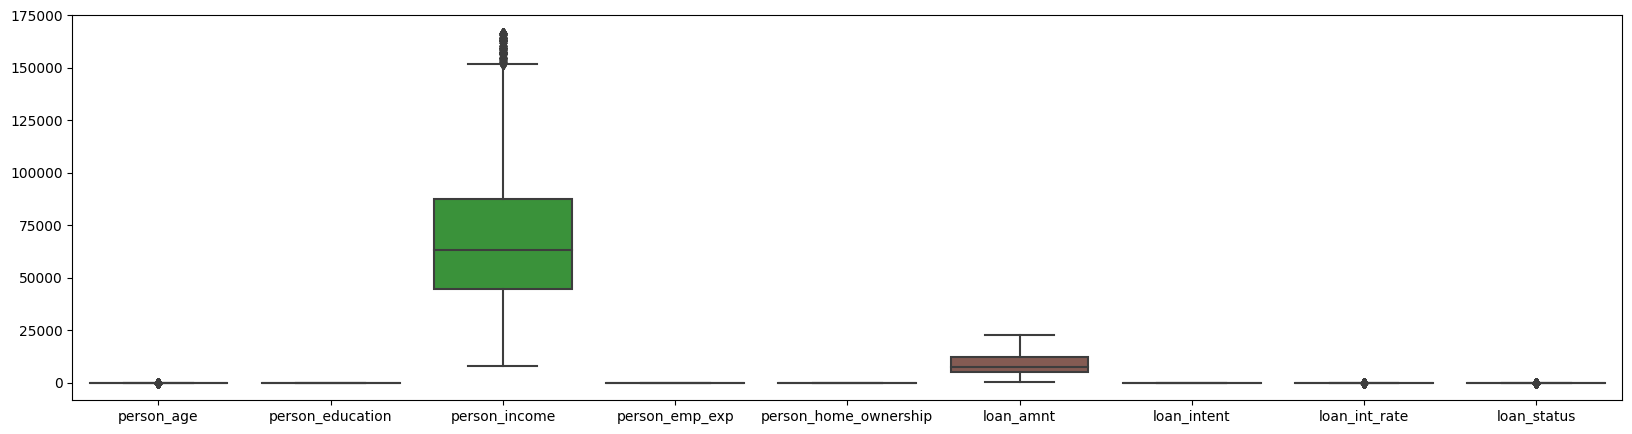

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(new_df)

<Axes: >

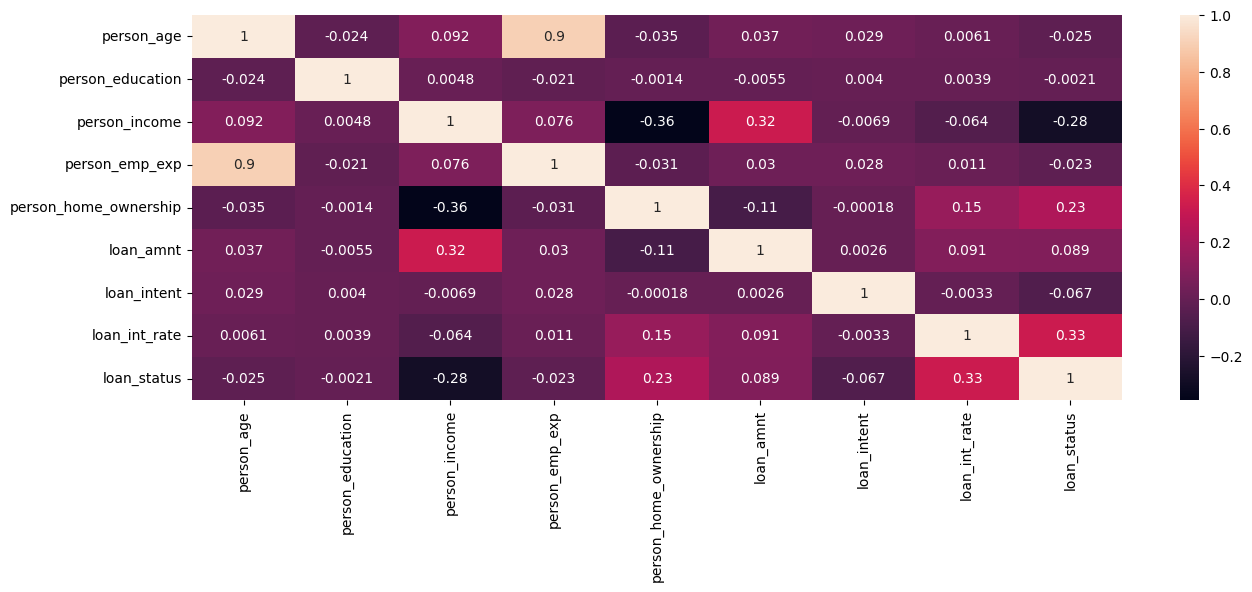

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(new_df.corr(),annot=True)

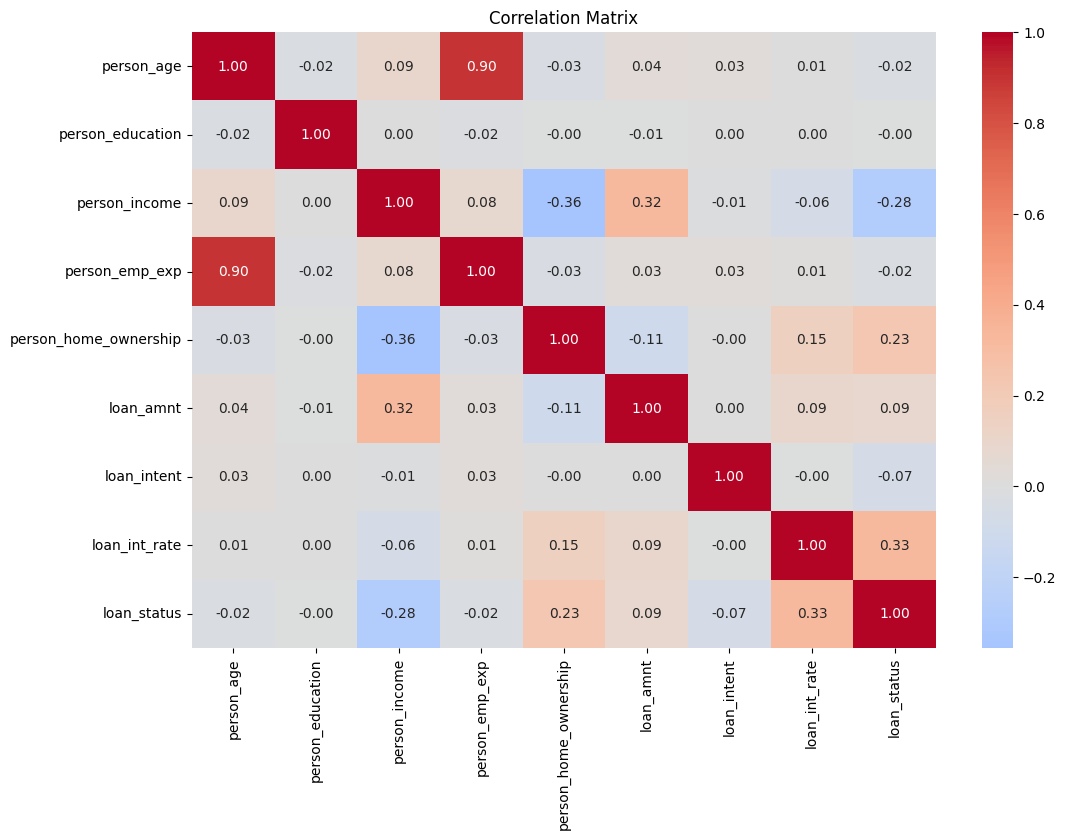

In [38]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = new_df.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [39]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [40]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [41]:
# loan_df.columns

## LOAD Machine Learning Or Prediciton or Advacned Libraries:- 

In [42]:
# Model Selection
from sklearn import model_selection
# Logistice
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.linear_model import Ridge , Lasso
# Cross validation
from sklearn.model_selection import cross_val_score,KFold,train_test_split, cross_val_predict , cross_validate
# Search CV
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,accuracy_score,mean_absolute_error,roc_curve, accuracy_score, precision_score, recall_score, f1_score,r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn import *
from sklearn.naive_bayes import GaussianNB,BernoulliNB , MultinomialNB
from sklearn.neural_network import *
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import sys
import scipy
import matplotlib
import sklearn

In [43]:
new_df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_status
1,21.0,3,12282.0,0,2,1000.0,1,11.14,0
2,25.0,3,12438.0,3,0,5500.0,3,12.87,1
5,21.0,3,12951.0,0,2,2500.0,5,7.14,1
9,21.0,3,12739.0,0,2,1600.0,5,14.74,1
11,21.0,0,13113.0,0,2,4500.0,2,8.63,1


In [44]:
new_df['person_age'].value_counts().sort_values()

person_age
20.0      11
39.0     157
38.0     326
37.0     487
36.0     596
35.0     736
34.0     857
33.0    1104
32.0    1242
21.0    1251
31.0    1446
30.0    1757
29.0    2167
28.0    2434
27.0    2787
26.0    3322
22.0    4061
25.0    4127
24.0    4729
23.0    4947
Name: count, dtype: int64

In [46]:
def age_fun(x):
    if x >= 35:
        return 1
    elif x < 35 and x >= 30:
        return 2
    elif x < 30 and x >= 25:
        return 3 
    elif x < 25 and x >= 20:
        return 4
    else:
        return 5  # optional, for ages below 20 or missing data
new_df['person_age'] = new_df['person_age'].apply(age_fun)


# Divided Dataset into Feature or Target Variable:- 

In [47]:
# new_df.drop(['credit_score'],axis=1,inplace=True)

In [48]:
X = new_df.drop(['loan_status'],axis=1)
X

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate
1,4,3,12282.0,0,2,1000.0,1,11.14
2,3,3,12438.0,3,0,5500.0,3,12.87
5,4,3,12951.0,0,2,2500.0,5,7.14
9,4,3,12739.0,0,2,1600.0,5,14.74
11,4,0,13113.0,0,2,4500.0,2,8.63
...,...,...,...,...,...,...,...,...
44994,4,0,31924.0,2,3,12229.0,3,10.70
44995,3,0,47971.0,6,3,15000.0,3,15.66
44997,2,0,56942.0,7,3,2771.0,0,10.02
44998,3,1,33164.0,4,3,12000.0,1,13.23


In [49]:
y = new_df[['loan_status']]
y

,loan_status
1,0
2,1
5,1
9,1
11,1
...,...
44994,1
44995,1
44997,1
44998,1


In [50]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Scipy: 1.15.2
Numpy: 1.24.3
Pandas: 2.2.3
Matplotlib: 3.7.1
Seaborn: 0.12.2
Sklearn: 1.4.2


In [51]:
models=[]
models.append(('LR:',LogisticRegression(solver='liblinear',multi_class='ovr',C=10)))
models.append(('LDA:',LinearDiscriminantAnalysis()))
models.append(('KNN:',KNeighborsClassifier(n_neighbors=5,weights='distance')))
models.append(('DTC(CART:)',DecisionTreeClassifier(max_depth=5,criterion='entropy')))
models.append(('RFC: ',RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5)))
models.append(('XGBClassifier: ',XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.01,subsample=0.8,colsample_bytree=0.8,gamma=0.1)))
models.append(('AdaBoostClassifier: ',AdaBoostClassifier(n_estimators=100,learning_rate=0.01)))
models.append(('GradientBoostingClassifier: ',GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)))
models.append(('NB:',BernoulliNB()))
models.append(('Perceptron: ',Perceptron(
    penalty='elasticnet',                # 'l2', 'l1', or 'elasticnet' (regularization)
    alpha=0.0001,                # Regularization strength (if penalty is used)
    fit_intercept=True,         # Whether to include a bias term (intercept)
    max_iter=1000,              # Maximum number of epochs over the data
    tol=1e-3,                   # Stopping criterion (minimum change in loss)
    shuffle=True,               # Shuffle training data after each epoch
    eta0=1.0,                   # Initial learning rate
    early_stopping=False,       # Whether to stop early on validation score
    validation_fraction=0.1,    # Fraction of data for validation (if early stopping)
    n_iter_no_change=5,         # Tolerance epochs for early stopping
    class_weight=None,          # Adjust weights for class imbalance
    warm_start=False,           # Reuse previous model weights (for continued training)
    random_state=None,          # Seed for reproducibility
    verbose=0                   # Print logs (0 = silent)
)))
#models.append(('SVC',SVC(C=1,kernel='rbf',gamma=0.1))) # gamma='auto'

In [52]:
seed = 42 # 6
scoring = 'accuracy'

## Divided Target and feature Variable into train and test split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=seed,stratify=y) # stratify=None

In [54]:
X_train.shape,X_test.shape

((30835, 8), (7709, 8))

In [55]:
y_train.shape,y_test.shape

((30835, 1), (7709, 1))

In [56]:
X_train

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate
40436,4,3,145167.0,5,0,14000.0,1,10.00
13251,3,3,108849.0,2,0,15000.0,0,8.49
39183,3,3,55424.0,0,0,15006.0,2,15.94
31137,1,0,94438.0,14,0,15000.0,4,7.88
30075,1,3,82725.0,14,3,5000.0,1,13.49
...,...,...,...,...,...,...,...,...
21996,2,0,67876.0,12,3,7000.0,3,7.29
9979,4,3,52549.0,0,3,9100.0,5,13.24
7815,4,1,49133.0,2,3,7000.0,3,11.58
28166,2,4,70012.0,10,3,2000.0,3,11.01


In [58]:
new_df['loan_status'].value_counts()

loan_status
0    30015
1     8529
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

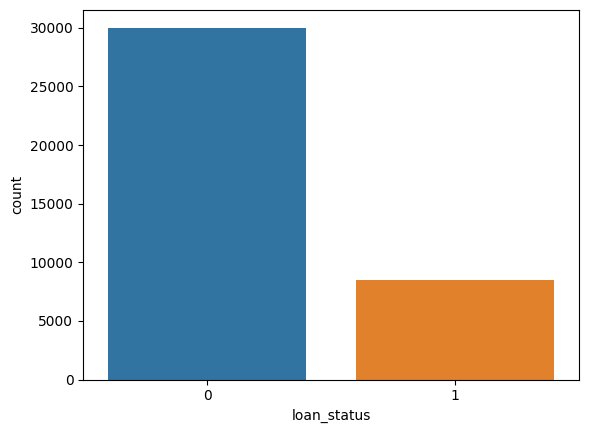

In [59]:
sns.countplot(x=new_df['loan_status'])

<Axes: xlabel='loan_status', ylabel='count'>

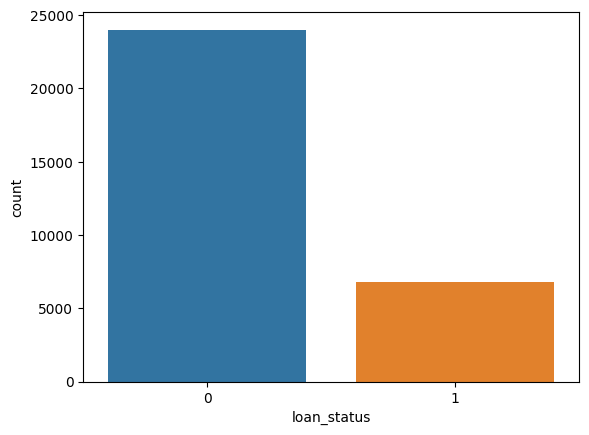

In [60]:
sns.countplot(x= y_train['loan_status'])

# Apply Class Imbalance Handling Techniques --> Sampling ( Over Sampling and undersampling )

In [61]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

In [62]:
# Apply Random Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Count the class distribution before under sampling
print("Class distribution before Random Under Sampling:", y_train.value_counts())

# Count the class distribution after under sampling
print("Class distribution after Random Under Sampling:", y_train_under.value_counts())

Class distribution before Random Under Sampling: loan_status
0              24012
1               6823
Name: count, dtype: int64
Class distribution after Random Under Sampling: loan_status
0              6823
1              6823
Name: count, dtype: int64


In [63]:
# Apply Random Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# Count the class distribution before over sampling
print("Class distribution before Random Over Sampling:", y_train.value_counts())
      
# Count the class distribution after over sampling
print("Class distribution after Random Over Sampling:", y_train_over.value_counts())

Class distribution before Random Over Sampling: loan_status
0              24012
1               6823
Name: count, dtype: int64
Class distribution after Random Over Sampling: loan_status
0              24012
1              24012
Name: count, dtype: int64


# SMOTE (Synthetic Minority Over-sampling Technique)

In [64]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape {y_train.value_counts()}')
print(f'Resampled dataset shape {y_resampled.value_counts()}')

Original dataset shape loan_status
0              24012
1               6823
Name: count, dtype: int64
Resampled dataset shape loan_status
0              24012
1              24012
Name: count, dtype: int64


# Tomek Links removes ambiguous examples from the majority class that are close to the minority class.

In [65]:
# Apply Tomek Links
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Count the class distribution before Tomek Links
print("Class distribution before Tomek Links:", y_train.value_counts())

# Count the class distribution after Tomek Links
print("Class distribution after Tomek Links:", y_train_tomek.value_counts())


Class distribution before Tomek Links: loan_status
0              24012
1               6823
Name: count, dtype: int64
Class distribution after Tomek Links: loan_status
0              22207
1               6823
Name: count, dtype: int64


# SMOTE-Tomek
This technique combines SMOTE and Tomek Links for better results.

In [66]:
# Apply Hybrid Approach (SMOTE + Tomek Links)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Count the class distribution before SMOTE-Tomek
print("Class distribution before SMOTE-Tomek:", y_train.value_counts())

# Count the class distribution after SMOTE-Tomek
print("Class distribution after SMOTE-Tomek:", y_train_smote_tomek.value_counts())

Class distribution before SMOTE-Tomek: loan_status
0              24012
1               6823
Name: count, dtype: int64
Class distribution after SMOTE-Tomek: loan_status
0              22004
1              22004
Name: count, dtype: int64


Recommendations
1. For models requiring high precision, Random Under Sampling or Tomek Links can be considered.
2. If high recall is a priority, SMOTE and SMOTE-Tomek are recommended.
3. The best approach often depends on the specific context of the business problem and acceptable trade-offs between precision and recall.

In [202]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits = 5, random_state = seed,shuffle=True)
    # n_splits = min(10, len(X_train))
    # kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LR: : 0.804508 (0.003874)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LDA: : 0.828020 (0.005132)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

KNN: : 0.824291 (0.003615)
DTC(CART:) : 0.876245 (0.004542)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

RFC:  : 0.894860 (0.005326)
XGBClassifier:  : 0.881660 (0.005525)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The S

AdaBoostClassifier:  : 0.797438 (0.006455)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:11

GradientBoostingClassifier:  : 0.894049 (0.004436)
NB: : 0.778725 (0.005627)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Perceptron:  : 0.569094 (0.279467)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
# RFC: 0.897550 (0.003394)
# GradientBoostingClassifier:  : 0.891594 (0.003210)
# XGBClassifier:  : 0.888834 (0.004565)
# DTC(CART:) : 0.870627 (0.002259)

# comparing Algorithms and select the best model 

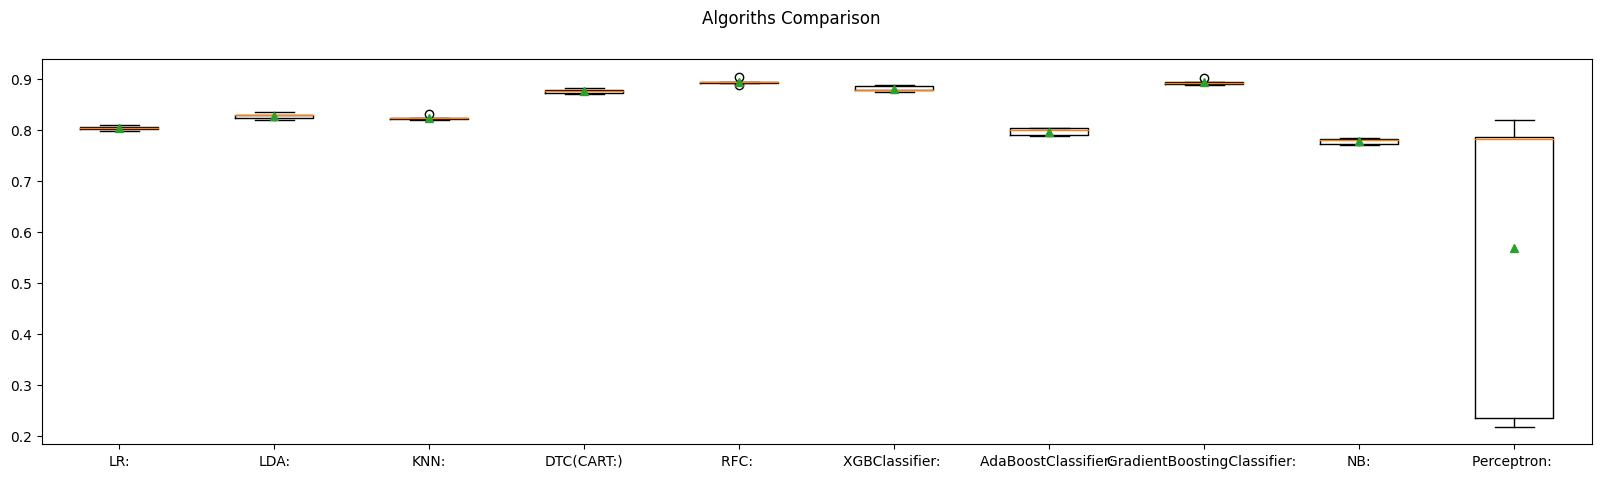

In [204]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Algoriths Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

##  RandomForestClassifier score is high when compared to all other 

In [205]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits = 5, random_state = seed,shuffle=True)
    # n_splits = min(10, len(X_train))
    # kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model,X_train_smote_tomek,y_train_smote_tomek,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LR: : 0.769474 (0.013881)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LDA: : 0.792333 (0.004524)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

KNN: : 0.888838 (0.001898)
DTC(CART:) : 0.803081 (0.004089)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

RFC:  : 0.863684 (0.005041)
XGBClassifier:  : 0.889134 (0.003957)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The S

AdaBoostClassifier:  : 0.751863 (0.003069)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:11

GradientBoostingClassifier:  : 0.860548 (0.004007)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

NB: : 0.645860 (0.006082)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Perceptron:  : 0.615595 (0.055284)


In [206]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits = 5, random_state = seed,shuffle=True)
    # n_splits = min(10, len(X_train))
    # kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model,X_resampled,y_resampled,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LR: : 0.767637 (0.017121)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LDA: : 0.781651 (0.003949)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

KNN: : 0.835124 (0.001441)
DTC(CART:) : 0.795019 (0.004126)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

RFC:  : 0.852594 (0.003527)
XGBClassifier:  : 0.877082 (0.001890)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The S

AdaBoostClassifier:  : 0.751208 (0.002961)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:11

GradientBoostingClassifier:  : 0.850783 (0.002303)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

NB: : 0.639951 (0.003340)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Perceptron:  : 0.586499 (0.049589)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits = 5, random_state = seed,shuffle=True)
    # n_splits = min(10, len(X_train))
    # kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model,X_train_tomek,y_train_tomek,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LR: : 0.817292 (0.008361)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

LDA: : 0.824182 (0.006395)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

KNN: : 0.860386 (0.004613)
DTC(CART:) : 0.870720 (0.004522)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

RFC:  : 0.890389 (0.004845)
XGBClassifier:  : 0.883569 (0.004380)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The S

AdaBoostClassifier:  : 0.789080 (0.005533)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:11

GradientBoostingClassifier:  : 0.890940 (0.004557)
NB: : 0.764967 (0.004033)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Perceptron:  : 0.784740 (0.018130)


## Build RandomForestClassifier:- 

In [197]:
# Initialize the model
#model = RandomForestClassifier(n_estimators=100, random_state=6)

# Initialize the model with potential hyperparameter tuning
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_depth=10,  # You can adjust these hyperparameters
    min_samples_split=5,
    min_samples_leaf=1,
    #ccp_alpha  = 0.0
)

## Apply Kfold Validation with 5 splits

In [198]:
# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=41)

In [199]:
scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

## Perform Cross-validation for check model accuracy:-

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

Cross-Validation Scores: [0.91740514 0.91888207 0.9202454  0.91070211 0.91842763]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6384\3118812056.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv_scores)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


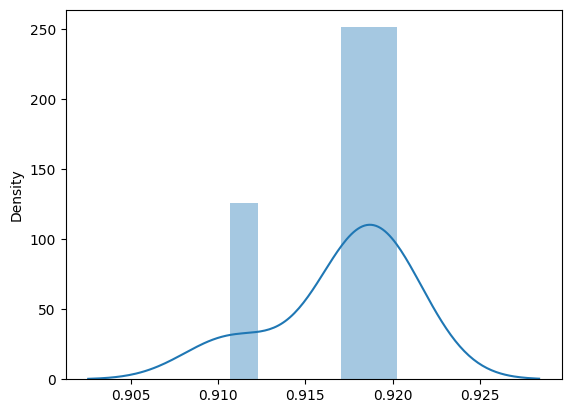

Mean Accuracy: 0.9171324698932061
Standard Deviation: 0.0033422360387542834


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

Cross-Validation Scores: [0.91967088 0.92070943 0.92221732 0.91309462 0.92109827]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6384\3118812056.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv_scores)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


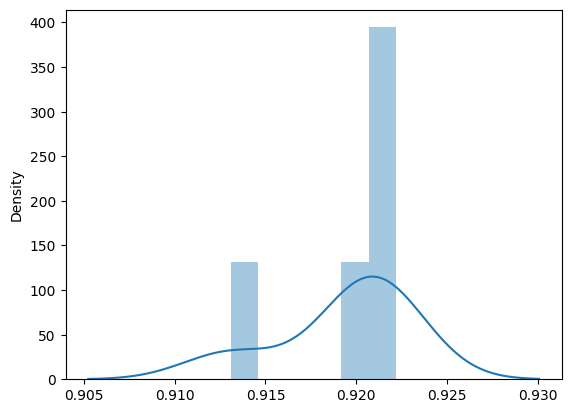

Mean Accuracy: 0.9193581048223958
Standard Deviation: 0.0032359983227531184


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

Cross-Validation Scores: [0.91705644 0.91924137 0.92011518 0.91054821 0.91872402]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6384\3118812056.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv_scores)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


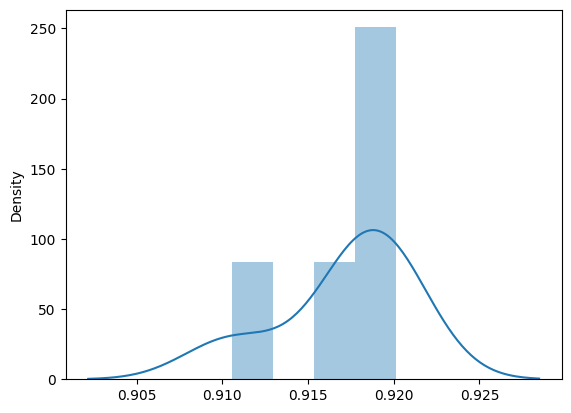

Mean Accuracy: 0.9171370438097067
Standard Deviation: 0.0034419551280958287


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

Cross-Validation Scores: [0.91724015 0.91883228 0.9201345  0.91054914 0.91833276]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6384\3118812056.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv_scores)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


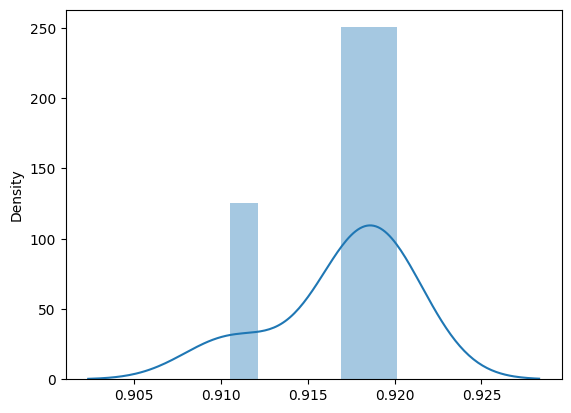

Mean Accuracy: 0.9170177653896712
Standard Deviation: 0.0033653619732368755


In [200]:
# Perform cross-validation
# X_train_smote_tomek  , X_resampled

for i in scoring:
    cv_scores = cross_val_score(model, X_train_smote_tomek, y_train_smote_tomek, cv=kfold, scoring=i)
    # Display results
    print("Cross-Validation Scores:", cv_scores)
    sns.distplot(cv_scores)
    plt.show()
    print("Mean Accuracy:", cv_scores.mean())
    print("Standard Deviation:", cv_scores.std())

In [ ]:
# #Print the cross-validation results
# print("Cross-validation scores:", cv_scores)
# print("Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

## Apply Cross-validation for model Prediction:- 

In [201]:
# Comprehensive cross-validation
cv_results = cross_validate(
    model, 
    X_train_smote_tomek, y_train_smote_tomek, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

In [202]:
# Print detailed cross-validation results
print("Cross-Validation Metrics:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric.replace('test_', '')}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Cross-Validation Metrics:
accuracy: 0.9171 (+/- 0.0067)
precision_macro: 0.9194 (+/- 0.0065)
recall_macro: 0.9171 (+/- 0.0069)
f1_macro: 0.9170 (+/- 0.0067)


In [203]:
cv_results

{'fit_time': array([7.45932603, 7.27614284, 7.23390293, 7.17537308, 7.33468604]),
 'score_time': array([0.20383239, 0.22887683, 0.26641154, 0.23225069, 0.19978595]),
 'test_accuracy': array([0.91740514, 0.91888207, 0.9202454 , 0.91070211, 0.91842763]),
 'test_precision_macro': array([0.91967088, 0.92070943, 0.92221732, 0.91309462, 0.92109827]),
 'test_recall_macro': array([0.91705644, 0.91924137, 0.92011518, 0.91054821, 0.91872402]),
 'test_f1_macro': array([0.91724015, 0.91883228, 0.9201345 , 0.91054914, 0.91833276])}

In [204]:
# Perform Cross-Validated Predictions
cv_predictions = cross_val_predict(
    estimator=model, 
    X=X_train_smote_tomek, 
    y=y_train_smote_tomek, 
    cv=kfold,
)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionW

In [205]:
# Comprehensive Model Evaluation
def evaluate_predictions(y_true, y_pred):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='binary'),
        'Recall (Macro)': recall_score(y_true, y_pred, average='binary'),
        'F1 Score (Macro)': f1_score(y_true, y_pred, average='binary')
    }
    return results

# {'weighted', 'macro', 'micro', 'samples', 'binary'}
# ValueError: Samplewise metrics are not available outside of multilabel classification. for samples

In [206]:
# Compute evaluation metrics
evaluation_metrics = evaluate_predictions(y_train_smote_tomek, cv_predictions)
evaluation_metrics

{'Accuracy': 0.9171324698932061,
 'Precision (Macro)': 0.8888088783463233,
 'Recall (Macro)': 0.9535560099977278,
 'F1 Score (Macro)': 0.9200447240918159}

In [94]:
print("Cross-Validation Prediction Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

Cross-Validation Prediction Metrics:
Accuracy: 0.8669
Precision (Macro): 0.8753
Recall (Macro): 0.8557
F1 Score (Macro): 0.8654


In [207]:
# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_train_smote_tomek, cv_predictions))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     22005
           1       0.89      0.95      0.92     22005

    accuracy                           0.92     44010
   macro avg       0.92      0.92      0.92     44010
weighted avg       0.92      0.92      0.92     44010



In [208]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_train_smote_tomek, cv_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19380  2625]
 [ 1022 20983]]


In [209]:
print("Mean Absolute Error:",mean_absolute_error(y_train_smote_tomek, cv_predictions) * 100)
print("Mean Squared Error:",mean_squared_error(y_train_smote_tomek, cv_predictions)*100)
print("R2 Score:",r2_score(y_train_smote_tomek, cv_predictions) * 100)

Mean Absolute Error: 8.28675301067939
Mean Squared Error: 8.28675301067939
R2 Score: 66.85298795728242


In [210]:
cv_predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [211]:
from scipy.stats import uniform

In [212]:
# models.append(('RFC: ',RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5)))
# model1 = XGBClassifier(n_estimators=100,max_depth=10,learning_rate=0.01,subsample=0.8,colsample_bytree=0.8,gamma=0.1)
# GradientBoostingClassifier
# # X_train_smote_tomek  , X_resampled

In [239]:
# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomForestClassifier

In [ ]:
# model = RandomForestClassifier(
#     n_estimators=100,           # Number of trees in the forest
#     criterion='gini',           # Function to measure split quality: 'gini' or 'entropy' (or 'log_loss' for sklearn ≥ 1.1)
#     max_depth=None,             # Max depth of a tree (controls overfitting)
#     min_samples_split=2,        # Min samples to split an internal node
#     min_samples_leaf=1,         # Min samples required to be a leaf node
#     min_weight_fraction_leaf=0.0, # Min weighted fraction of samples per leaf
#     max_features='sqrt',        # Number of features to consider when splitting: 'sqrt', 'log2', or a float/int
#     max_leaf_nodes=None,        # Max number of leaf nodes in each tree
#     min_impurity_decrease=0.0,  # Node is split if impurity decreases > this
#     bootstrap=True,             # Use bootstrap samples (True) or whole dataset (False)
#     oob_score=False,            # Use out-of-bag samples to estimate generalization score
#     n_jobs=-1,                  # Use all processors (for speed)
#     random_state=None,          # Seed for reproducibility
#     verbose=0,                  # Show progress (0 = silent)
#     warm_start=False,           # Reuse previous model (add more trees)
#     class_weight=None           # Handle imbalanced data: 'balanced', 'balanced_subsample', or dict
# )

In [52]:
# Define hyperparameter distributions
param_grid = {
    'n_estimators': [10,50,100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 4,5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini','entropy']
}

# Randomized search with 20 random combinations
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=20,              # number of random combinations to try
    scoring='f1',
    cv=kf,                  # custom KFold strategy
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit
random_search.fit(X_train_smote_tomek, y_train_smote_tomek)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced'}
Best CV Score: 0.9070433749212082


In [58]:
# Define hyperparameter distributions
param_grid = {
    'n_estimators': [10,50,100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 4,5],
    'max_features': ['sqrt', 'log2',None],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini','entropy'],
    'bootstrap': [True, False]
}

# Randomized search with 20 random combinations
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=20,              # number of random combinations to try
    scoring='f1',
    cv=kf,                  # custom KFold strategy
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit
random_search.fit(X_resampled, y_resampled)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Best CV Score: 0.8979475196499445


In [102]:
# # Define hyperparameter distributions
# param_dist = {
#     'n_estimators': randint(10, 1000),    # number of trees
#     'max_depth': [None] + list(np.arange(10, 50, 10)),
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False],
#     'class_weight': [None, 'balanced'],
#     'criterion': ['gini','entropy']
# }

# # Create the model
# rf = RandomForestClassifier(random_state=42)

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=20,                  # Try 20 random combinations
#     scoring='f1',         # Can also use 'f1', 'roc_auc', accuracy, etc.
#     cv=kf,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit on training data
# random_search.fit(X_resampled, y_resampled)

# # Best hyperparameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best CV Score:", random_search.best_score_)

In [208]:
rf = RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf =1,max_features = 'sqrt',
                            max_depth=20,criterion='gini',class_weight='balanced',bootstrap=True)
rf.fit(X_train_smote_tomek,y_train_smote_tomek)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=500)

In [209]:
y_pred = rf.predict(X_test)

In [210]:
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [211]:
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',rf.score(X_train_smote_tomek,y_train_smote_tomek))
print('Testing Scores:-',rf.score(X_test,y_test))
    

Cross-Validation Metrics on Training Data:
Accuracy: 0.8622389414969516
Precision (Macro): 0.7980175516107648
Recall (Macro): 0.8137813664484679
F1 Score (Macro): 0.8053726736601955

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6003
           1       0.68      0.73      0.70      1706

    accuracy                           0.86      7709
   macro avg       0.80      0.81      0.81      7709
weighted avg       0.87      0.86      0.86      7709

[[5407  596]
 [ 466 1240]]
Mean Absolute Error: 13.776105850304837
Mean Squared Error: 13.776105850304837
R2 Score: 0.20057966327504462
Traning Scores:- 0.9976140701690601
Testing Scores:- 0.8622389414969516



Top 10 Most Important Features:
                 feature  importance
1          person_income    0.313614
6          loan_int_rate    0.241295
4              loan_amnt    0.175066
3  person_home_ownership    0.084795
5            loan_intent    0.081287
2         person_emp_exp    0.056630
0       person_education    0.047313


<Figure size 1000x600 with 0 Axes>

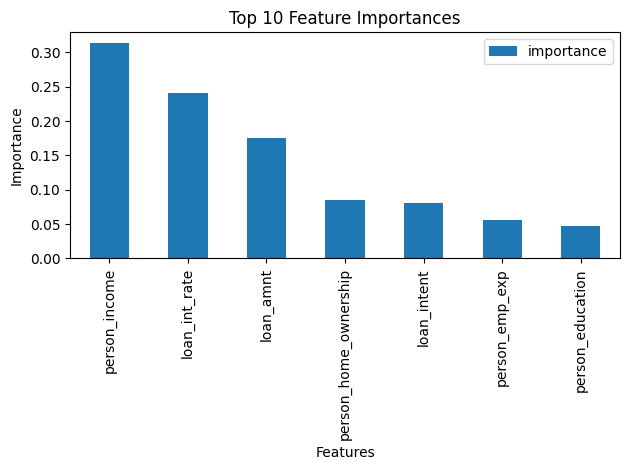

In [92]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_train_smote_tomek.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
print(feature_importance)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [54]:
from scipy.stats import randint, uniform

In [212]:
rf = RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf =1,max_features = 'sqrt',
                            max_depth=20,criterion='gini',class_weight='balanced',bootstrap=True)
rf.fit(X_resampled,y_resampled)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=500)

In [213]:
y_pred = rf.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',rf.score(X_resampled,y_resampled))
print('Testing Scores:-',rf.score(X_test,y_test))
    

Cross-Validation Metrics on Training Data:
Accuracy: 0.8621092229861201
Precision (Macro): 0.7976897391265826
Recall (Macro): 0.8149568240498742
F1 Score (Macro): 0.8056890948976435

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6003
           1       0.67      0.73      0.70      1706

    accuracy                           0.86      7709
   macro avg       0.80      0.81      0.81      7709
weighted avg       0.87      0.86      0.86      7709

[[5400  603]
 [ 460 1246]]
Mean Absolute Error: 13.789077701387988
Mean Squared Error: 13.789077701387988
R2 Score: 0.19982691342878756
Traning Scores:- 0.9962310511410961
Testing Scores:- 0.8621092229861201


In [214]:
rf.fit(X_train_tomek,y_train_tomek)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=500)

In [215]:
y_pred = rf.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',rf.score(X_train_tomek,y_train_tomek))
print('Testing Scores:-',rf.score(X_test,y_test))
    

Cross-Validation Metrics on Training Data:
Accuracy: 0.8977818134647815
Precision (Macro): 0.8750243749017141
Recall (Macro): 0.8143653847167858
F1 Score (Macro): 0.8392014330353701

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6003
           1       0.84      0.66      0.74      1706

    accuracy                           0.90      7709
   macro avg       0.88      0.81      0.84      7709
weighted avg       0.89      0.90      0.89      7709

[[5787  216]
 [ 572 1134]]
Mean Absolute Error: 10.221818653521858
Mean Squared Error: 10.221818653521858
R2 Score: 0.4068331211494681
Traning Scores:- 0.9996555287633483
Testing Scores:- 0.8977818134647815


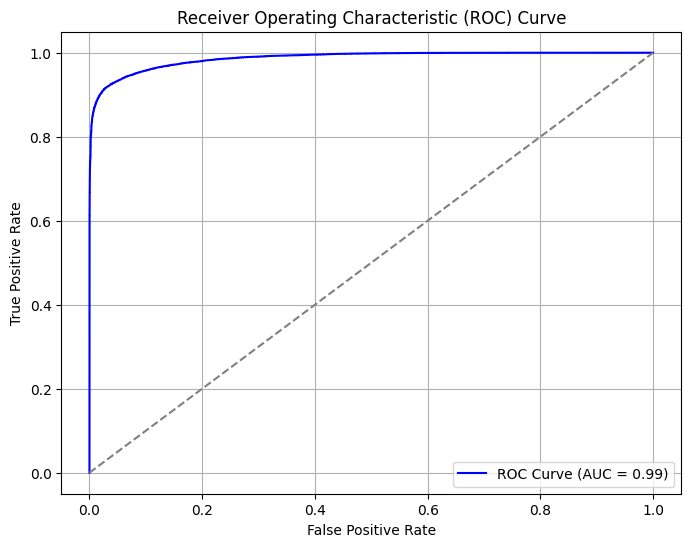

In [216]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = rf.predict_proba(X_train_smote_tomek)[:, 1]  # Probabilities for class 1 ( X_train_smote_tomek , X_resampled )

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_smote_tomek, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

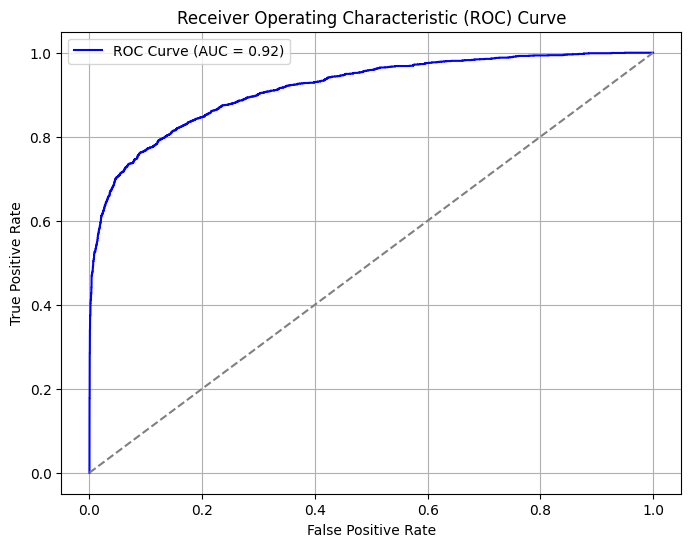

In [217]:
# Get predicted probabilities (for ROC/AUC)
y_probs =rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


Top 10 Most Important Features:
                 feature  importance
2          person_income    0.325516
7          loan_int_rate    0.253793
5              loan_amnt    0.167428
4  person_home_ownership    0.076820
6            loan_intent    0.063396
3         person_emp_exp    0.056950
1       person_education    0.033964
0             person_age    0.022132


<Figure size 1000x600 with 0 Axes>

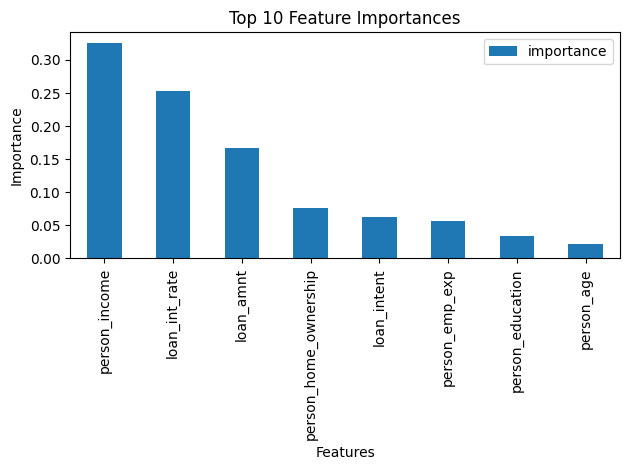

In [218]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
print(feature_importance)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_train_smote_tomek.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
feature_importance

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# XGClassifier

In [ ]:
# model = XGBClassifier(
#     n_estimators=100,         # Number of boosting rounds (trees)
#     learning_rate=0.1,        # Step size shrinkage
#     max_depth=6,              # Max depth of trees
#     min_child_weight=1,       # Min sum of instance weight (Hessian) in a child
#     gamma=0,                  # Minimum loss reduction for a split
#     subsample=1,              # Fraction of samples used per tree
#     colsample_bytree=1,       # Fraction of features used per tree
#     reg_alpha=0,              # L1 regularization term
#     reg_lambda=1,             # L2 regularization term
#     scale_pos_weight=1,       # Used for imbalanced classes
#     objective='binary:logistic',  # Objective function
#     eval_metric='logloss',    # Metric to evaluate model performance
#     use_label_encoder=False,  # Avoids warning (required in recent versions)
#     n_jobs=-1,                # Use all cores
#     random_state=42           # Seed
# )

In [85]:
# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'scale_pos_weight': [1, 2, 3]  # Use if dataset is imbalanced
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,  # Try 30 random combinations
    scoring='accuracy',  # or 'roc_auc', 'f1', etc.
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on data
random_search.fit(X_resampled, y_resampled)

# Output best model
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:39:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'colsample_bytree': 0.9978202043189364, 'gamma': 0.23497225699547147, 'learning_rate': 0.09386810253902757, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 991, 'reg_alpha': 0.015456616528867428, 'reg_lambda': 0.9283185625877254, 'scale_pos_weight': 1, 'subsample': 0.821105986734196}
Best Score: 0.9234098228663447


# 🔧 How to Reduce Overfitting (Improve Generalization):

In [219]:
# xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
#                    colsample_bytree=0.8,gamma=0.2349,learning_rate=0.1,max_depth =4,min_child_weight=5,n_estimators=300,
#                    rag_alpha=0.1,reg_lambda=1.0,scale_pos_weight=1,subsample=0.8,early_stopping_rounds=10)

xg = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    early_stopping_rounds=20
)

xg.fit(X_resampled, y_resampled, eval_set=[(X_test, y_test)], verbose=False)

# xg.fit(X_resampled,y_resampled,eval_set=[(X_test, y_test)],  # ✅ provide a validation set here
#     verbose=True)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\callback.py:386: UserWarning: [19:12:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [220]:
y_pred = xg.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',xg.score(X_resampled,y_resampled))
print('Testing Scores:-',xg.score(X_test,y_test))
    

Cross-Validation Metrics on Training Data:
Accuracy: 0.8609417563886367
Precision (Macro): 0.7956801629983266
Recall (Macro): 0.817983446729156
F1 Score (Macro): 0.8057565671950508

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6003
           1       0.67      0.74      0.70      1706

    accuracy                           0.86      7709
   macro avg       0.80      0.82      0.81      7709
weighted avg       0.87      0.86      0.86      7709

[[5373  630]
 [ 442 1264]]
Mean Absolute Error: 13.905824361136334
Mean Squared Error: 13.905824361136334
R2 Score: 0.19305216481247434
Traning Scores:- 0.8908670664667666
Testing Scores:- 0.8609417563886367



Top 10 Most Important Features:
                 feature  importance
7          loan_int_rate    0.195627
4  person_home_ownership    0.172444
1       person_education    0.143987
2          person_income    0.142073
6            loan_intent    0.116113
0             person_age    0.091088
5              loan_amnt    0.084251
3         person_emp_exp    0.054416


<Figure size 1000x600 with 0 Axes>

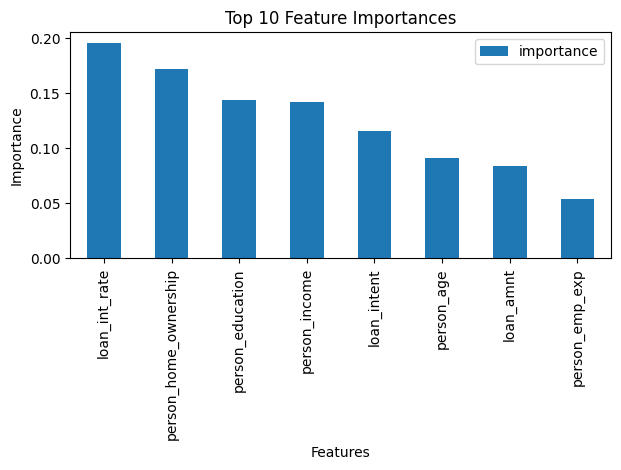

In [221]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': xg.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
print(feature_importance)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [107]:
# Define parameter distributions
# param_dist = {
#     'n_estimators': randint(100, 1000),
#     'learning_rate': uniform(0.01, 0.3),
#     'max_depth': randint(3, 10),
#     'min_child_weight': randint(1, 10),
#     'gamma': uniform(0, 0.5),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4),
#     'reg_alpha': uniform(0, 1),
#     'reg_lambda': uniform(0, 1),
#     'scale_pos_weight': [1, 2, 3]  # Use if dataset is imbalanced
# }

param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': [0.01,0.05],
    'max_depth': [3,4,5,6],
    'min_child_weight': [5,10],
    'gamma': uniform(0, 0.5),
    'subsample': [0.6,0.7,0.8],
    'colsample_bytree': [0.6,0.7, 0.8],
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'scale_pos_weight': [1, 2, 3]  # Use if dataset is imbalanced
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,  # Try 30 random combinations
    scoring='f1',  # or 'roc_auc', 'f1', etc.
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit on data
random_search.fit(X_train_smote_tomek, y_train_smote_tomek)

# Output best model
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'colsample_bytree': 0.8, 'gamma': 0.26041713001291183, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 819, 'reg_alpha': 0.7473201101373809, 'reg_lambda': 0.5396921323890798, 'scale_pos_weight': 2, 'subsample': 0.6}
Best Score: 0.9137474964163941


In [222]:
# xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
#                    colsample_bytree=0.9978,gamma=0.2349,learning_rate=0.0938,max_depth =8,min_child_weight=3,n_estimators=991,
#                    rag_alpha=0.015,reg_lambda=0.9283,scale_pos_weight=1,subsample=0.8211)

# xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
#                    colsample_bytree=0.8,gamma=0.2349,learning_rate=0.1,max_depth =4,min_child_weight=5,n_estimators=300,
#                    rag_alpha=0.1,reg_lambda=1.0,scale_pos_weight=1,subsample=0.8)

xg = XGBClassifier( n_estimators=500,learning_rate=0.05,max_depth=4,min_child_weight=6,subsample=0.8,colsample_bytree=0.8,
                    reg_alpha=0.5,reg_lambda=1.0,use_label_encoder=False,eval_metric='logloss',random_state=42,gamma= 0.26041713001291183)

xg.fit(X_train_smote_tomek,y_train_smote_tomek)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:13:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None,
              gamma=0.26041713001291183, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [223]:
y_pred = xg.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',xg.score(X_train_smote_tomek,y_train_smote_tomek))
print('Testing Scores:-',xg.score(X_test,y_test))
    

Cross-Validation Metrics on Training Data:
Accuracy: 0.8656116227785705
Precision (Macro): 0.8022834553085112
Recall (Macro): 0.8218211136713784
F1 Score (Macro): 0.8112553620662633

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      6003
           1       0.68      0.74      0.71      1706

    accuracy                           0.87      7709
   macro avg       0.80      0.82      0.81      7709
weighted avg       0.87      0.87      0.87      7709

[[5405  598]
 [ 438 1268]]
Mean Absolute Error: 13.43883772214295
Mean Squared Error: 13.43883772214295
R2 Score: 0.2201511592777271
Traning Scores:- 0.9020405380839848
Testing Scores:- 0.8656116227785705



Top 10 Most Important Features:
                 feature  importance
7          loan_int_rate    0.188802
4  person_home_ownership    0.163368
2          person_income    0.163236
1       person_education    0.145778
6            loan_intent    0.110270
5              loan_amnt    0.088956
0             person_age    0.085654
3         person_emp_exp    0.053935


<Figure size 1000x600 with 0 Axes>

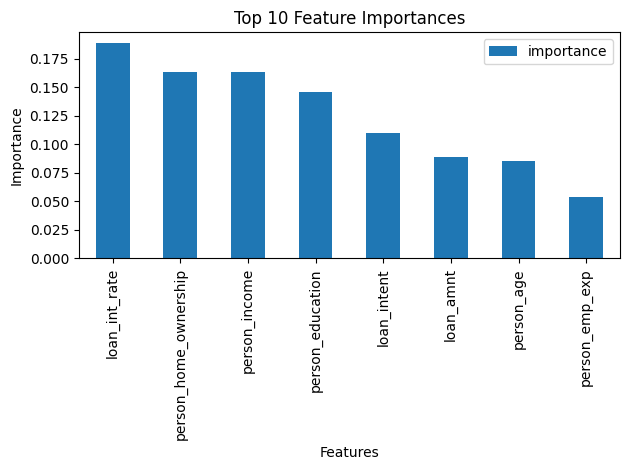

In [224]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': xg.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
print(feature_importance)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [225]:
xg = XGBClassifier(n_estimators=800,learning_rate=0.03,max_depth=5,subsample=0.8,colsample_bytree=0.8,
    min_child_weight=4,reg_alpha=0.1,reg_lambda=0.5,use_label_encoder=False,eval_metric='logloss',random_state=42 )
xg.fit(X_train_tomek,y_train_tomek)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, ...)

In [226]:
y_pred = xg.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',xg.score(X_train_smote_tomek,y_train_smote_tomek))
print('Testing Scores:-',xg.score(X_test,y_test))
    

Cross-Validation Metrics on Training Data:
Accuracy: 0.9049163315605137
Precision (Macro): 0.8860777113572215
Recall (Macro): 0.8260793401657904
F1 Score (Macro): 0.8509014770041522

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6003
           1       0.86      0.68      0.76      1706

    accuracy                           0.90      7709
   macro avg       0.89      0.83      0.85      7709
weighted avg       0.90      0.90      0.90      7709

[[5808  195]
 [ 538 1168]]
Mean Absolute Error: 9.508366843948632
Mean Squared Error: 9.508366843948632
R2 Score: 0.44823436269360417
Traning Scores:- 0.8429830939829122
Testing Scores:- 0.9049163315605137


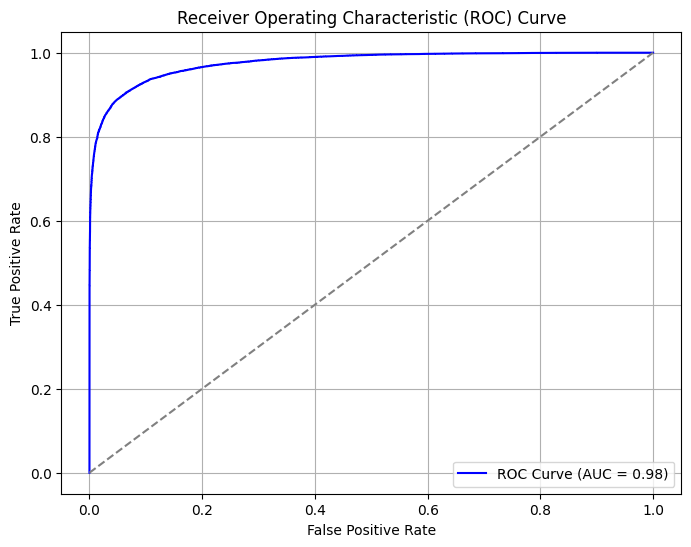

In [110]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = xg.predict_proba(X_resampled)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_resampled, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

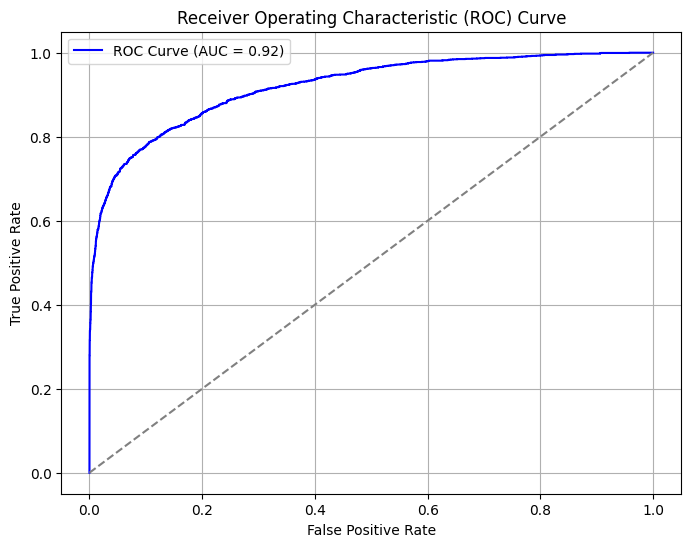

In [111]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = xg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# GradientBoostingClassifier

In [ ]:
# model = GradientBoostingClassifier(
#     loss='log_loss',           # 'log_loss' (logistic regression) for binary classification
#     learning_rate=0.1,         # Shrinks contribution of each tree
#     n_estimators=100,          # Number of boosting stages (trees)
#     subsample=1.0,             # Fraction of samples used for fitting each tree
#     criterion='friedman_mse',  # Function to measure quality of split
#     min_samples_split=2,       # Minimum number of samples to split an internal node
#     min_samples_leaf=1,        # Minimum number of samples at a leaf node
#     min_weight_fraction_leaf=0.0,
#     max_depth=3,               # Max depth of individual regression estimators
#     min_impurity_decrease=0.0,
#     max_features=None,         # Number of features considered at each split
#     verbose=0,                 # Show training progress
#     warm_start=False,          # Keep existing trees and add more (incremental learning)
#     validation_fraction=0.1,   # Used for early stopping
#     n_iter_no_change=None,     # Stop training if no improvement
#     tol=1e-4,                  # Tolerance for early stopping
#     random_state=42
# )

In [112]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

gbc = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_resampled, y_resampled)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

Best Params: {'learning_rate': 0.20002112695312704, 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 739, 'subsample': 0.922976062065625}
Best Score: 0.9295893719806763


In [ ]:
gbc = GradientBoostingClassifier(loss='log_loss',learning_rate=0.2,n_estimators=700,subsample=1.0,criterion='friedman_mse',
    min_samples_split=12,min_samples_leaf=4,min_weight_fraction_leaf=0.0,max_depth=8,min_impurity_decrease=0.0,max_features=None,
    verbose=0,warm_start=False, 
    validation_fraction=0.1,n_iter_no_change=None,tol=1e-4,random_state=42)

gbc.fit(X_resampled, y_resampled)
            

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
y_pred = gbc.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
confusion_matrix(y_test, y_pred)

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',gbc.score(X_resampled,y_resampled))
print('Testing Scores:-',gbc.score(X_test,y_test))

Cross-Validation Metrics on Training Data:
Accuracy: 0.9047264607368812
Precision (Macro): 0.8694396370585713
Recall (Macro): 0.857143298507008
F1 Score (Macro): 0.8630461894536916

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6211
           1       0.81      0.77      0.79      1850

    accuracy                           0.90      8061
   macro avg       0.87      0.86      0.86      8061
weighted avg       0.90      0.90      0.90      8061

Mean Absolute Error: 9.527353926311873
Mean Squared Error: 9.527353926311873
R2 Score: 0.4612132789688739
Traning Scores:- 0.9982085346215781
Testing Scores:- 0.8682545589877186


In [ ]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
print(feature_importance)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [115]:
gbc = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,n_estimators=100,subsample=1.0,criterion='friedman_mse',
    min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_depth=3,min_impurity_decrease=0.0,max_features=None,
    verbose=0,warm_start=False, 
    validation_fraction=0.1,n_iter_no_change=None,tol=1e-4,random_state=42)

gbc.fit(X_train_smote_tomek,y_train_smote_tomek)
            

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [116]:
y_pred = gbc.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
confusion_matrix(y_test, y_pred)

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',gbc.score(X_train_smote_tomek,y_train_smote_tomek))
print('Testing Scores:-',gbc.score(X_test,y_test))

Cross-Validation Metrics on Training Data:
Accuracy: 0.8316586031509738
Precision (Macro): 0.7642674120485882
Recall (Macro): 0.8049832250540672
F1 Score (Macro): 0.7799360161837134

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      6211
           1       0.61      0.76      0.67      1850

    accuracy                           0.83      8061
   macro avg       0.76      0.80      0.78      8061
weighted avg       0.85      0.83      0.84      8061

Mean Absolute Error: 16.83413968490262
Mean Squared Error: 16.83413968490262
R2 Score: 0.04800315046974202
Traning Scores:- 0.9987016416530963
Testing Scores:- 0.8682545589877186


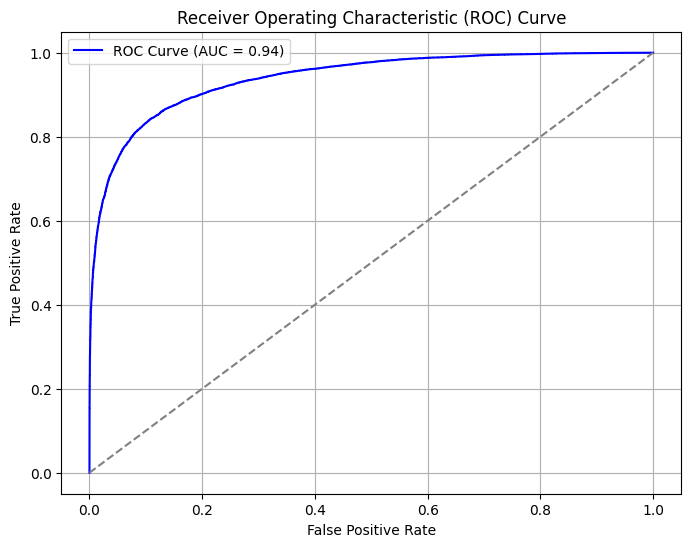

In [119]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = gbc.predict_proba(X_train_smote_tomek)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_smote_tomek, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

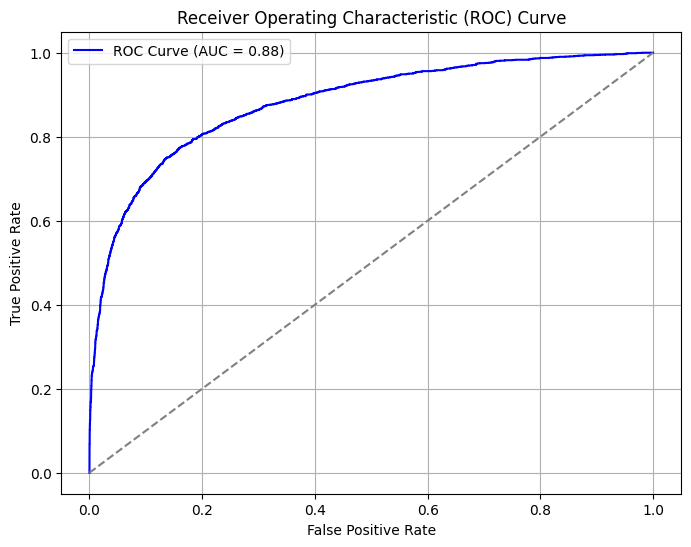

In [120]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = gbc.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

## Final Model Training and Prediction

# XG Boost Classifier

In [67]:
# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(300, 1000),           # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.1),          # Lower = less overfitting
    'max_depth': randint(3, 8),                   # Tree depth
    'min_child_weight': randint(1, 10),           # Minimum sum of instance weight in a child
    'subsample': uniform(0.6, 0.4),               # Row sampling
    'colsample_bytree': uniform(0.6, 0.4),        # Feature sampling
    'gamma': uniform(0, 0.5),                     # Minimum loss reduction to make a split
    'reg_alpha': uniform(0, 1),                   # L1 regularization
    'reg_lambda': uniform(0, 1),                  # L2 regularization
    'scale_pos_weight': [1, 2, 3]                 # Class imbalance handling
}

In [69]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=kf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_resampled, y_resampled)
print("Best Hyperparameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'colsample_bytree': 0.7232243167409557, 'gamma': 0.27127011527744965, 'learning_rate': 0.060881407683876, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 737, 'reg_alpha': 0.906098787718554, 'reg_lambda': 0.43439436551042865, 'scale_pos_weight': 1, 'subsample': 0.8010548372420768}
Best CV Accuracy: 0.9123663258510186


In [323]:
# para = (colsample_bytree=0.7232243167409557, gamma=0.27127011527744965, learning_rate=0.060881407683876, max_depth=7, min_child_weight=3, n_estimators=737, reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, scale_pos_weight=1, subsample=0.8010548372420768)

In [74]:
xg = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.9,
    reg_lambda=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    early_stopping_rounds=30,
    gamma=0.27127011527744965,
    scale_pos_weight =1
)

# xg = XGBClassifier(colsample_bytree=0.7232243167409557, gamma=0.27127011527744965, learning_rate=0.05, 
#                    max_depth=6, min_child_weight=3, n_estimators=700, 
#                    reg_alpha=0.906098787718554, reg_lambda=0.43439436551042865, scale_pos_weight=1, subsample=0.8010548372420768)

# xg = XGBClassifier(
#     n_estimators=500,
#     learning_rate=0.05,
#     max_depth=5,
#     min_child_weight=3,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_alpha=0.5,
#     reg_lambda=1.0,
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42,
#     early_stopping_rounds=20
# )

xg.fit(X_resampled, y_resampled, eval_set=[(X_test, y_test)], verbose=False)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:28:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None,
              gamma=0.27127011527744965, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [75]:
y_pred = xg.predict(X_test)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',xg.score(X_resampled,y_resampled))
print('Testing Scores:-',xg.score(X_test,y_test))

Cross-Validation Metrics on Training Data:
Accuracy: 0.8702814891685043
Precision (Macro): 0.8090351756095031
Recall (Macro): 0.8258685721617502
F1 Score (Macro): 0.8168801489244932

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6003
           1       0.69      0.75      0.72      1706

    accuracy                           0.87      7709
   macro avg       0.81      0.83      0.82      7709
weighted avg       0.87      0.87      0.87      7709

[[5436  567]
 [ 433 1273]]
Mean Absolute Error: 12.971851083149566
Mean Squared Error: 12.971851083149566
R2 Score: 0.24725015374297987
Traning Scores:- 0.9073171747459604
Testing Scores:- 0.8702814891685043



Top 10 Most Important Features:
                 feature  importance
4  person_home_ownership    0.185864
7          loan_int_rate    0.182257
2          person_income    0.145444
1       person_education    0.132157
6            loan_intent    0.124851
0             person_age    0.094825
5              loan_amnt    0.084053
3         person_emp_exp    0.050549


<Figure size 1000x600 with 0 Axes>

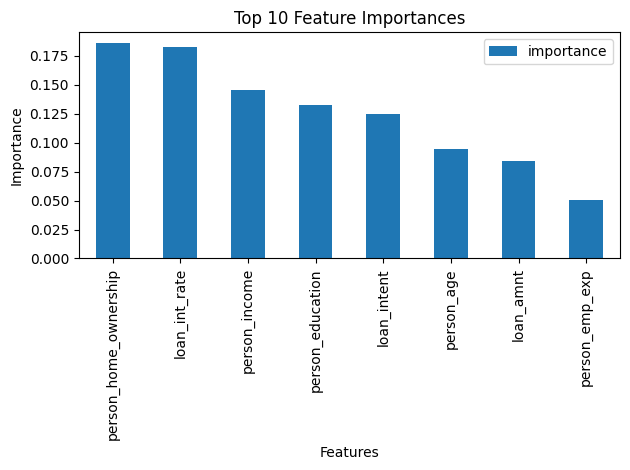

In [76]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': xg.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
print(feature_importance)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

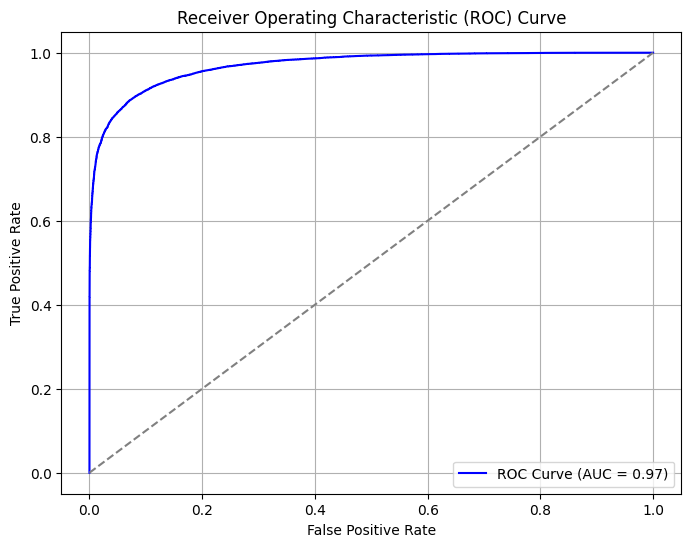

In [99]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = xg.predict_proba(X_resampled)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_resampled, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

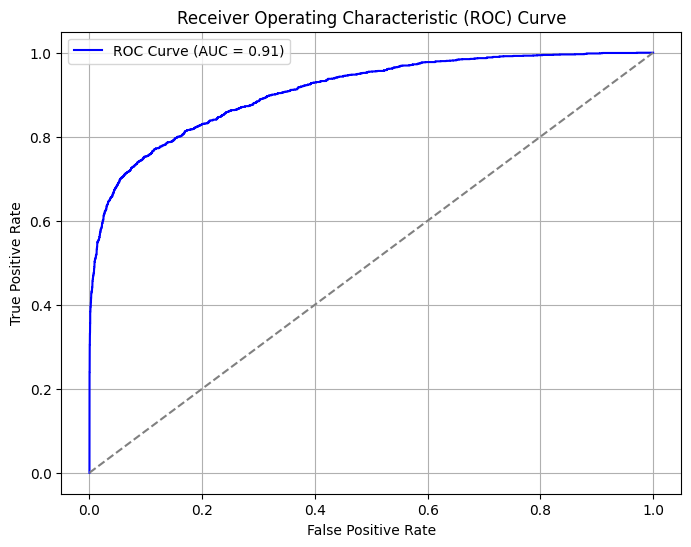

In [98]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities (for ROC/AUC)
y_probs = xg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

## Standarization Technique :- 


In [77]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_resampled)
X_test_scale = scale.transform(X_test)

In [78]:
xg.fit(X_train_scale, y_resampled, eval_set=[(X_test_scale, y_test)], verbose=False)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:29:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None,
              gamma=0.27127011527744965, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [79]:
y_pred = xg.predict(X_test_scale)
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred) * 100)

print("Mean Squared Error:",mean_squared_error(y_test, y_pred)*100)

print("R2 Score:",r2_score(y_test, y_pred))


print('Traning Scores:-',xg.score(X_train_scale,y_resampled))
print('Testing Scores:-',xg.score(X_test_scale,y_test))

Cross-Validation Metrics on Training Data:
Accuracy: 0.8702814891685043
Precision (Macro): 0.8090351756095031
Recall (Macro): 0.8258685721617502
F1 Score (Macro): 0.8168801489244932

Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6003
           1       0.69      0.75      0.72      1706

    accuracy                           0.87      7709
   macro avg       0.81      0.83      0.82      7709
weighted avg       0.87      0.87      0.87      7709

[[5436  567]
 [ 433 1273]]
Mean Absolute Error: 12.971851083149566
Mean Squared Error: 12.971851083149566
R2 Score: 0.24725015374297987
Traning Scores:- 0.9073171747459604
Testing Scores:- 0.8702814891685043


In [80]:
# Fit the model on the full training 
xg.fit(X_resampled, y_resampled, eval_set=[(X_test, y_test)], verbose=False)
final_predictions = xg.predict(X_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:29:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


In [81]:
final_predictions

array([0, 1, 0, ..., 0, 0, 1])

In [82]:
# Function to evaluate predictions
def evaluate_predictions(y_true, y_pred):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall (Macro)': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1 Score (Macro)': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }
    return results

In [83]:
print('Traning Scores:-',xg.score(X_resampled,y_resampled))
print('Testing Scores:-',xg.score(X_test,y_test))

Traning Scores:- 0.9073171747459604
Testing Scores:- 0.8702814891685043


In [84]:
# # Predict on test set
# y_pred = model.predict(X_test)

# Final Model Evaluation
final_evaluation = evaluate_predictions(y_test, final_predictions)
print("\nFinal Model Evaluation on Test Set:")
for metric, value in final_evaluation.items():
    print(f"{metric}: {value:.4f}")


Final Model Evaluation on Test Set:
Accuracy: 0.8703
Precision (Macro): 0.8090
Recall (Macro): 0.8259
F1 Score (Macro): 0.8169


In [85]:
# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, final_predictions))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6003
           1       0.69      0.75      0.72      1706

    accuracy                           0.87      7709
   macro avg       0.81      0.83      0.82      7709
weighted avg       0.87      0.87      0.87      7709



In [86]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions) # TP + TN / All
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5436  567]
 [ 433 1273]]


In [87]:
# Final Accuracy report 
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

Final Test Accuracy: 0.8703


In [88]:
print("Mean Absolute Error:",mean_absolute_error(y_test, final_predictions) * 100)

Mean Absolute Error: 12.971851083149566


In [89]:
print("Mean Squared Error:",mean_squared_error(y_test, final_predictions)*100)

Mean Squared Error: 12.971851083149566


In [90]:
print("R2 Score:",r2_score(y_test, final_predictions))

R2 Score: 0.24725015374297987


In [92]:
y_pred1 = xg.predict(X_test)
y_pred1

array([0, 1, 0, ..., 0, 0, 1])

<Axes: >

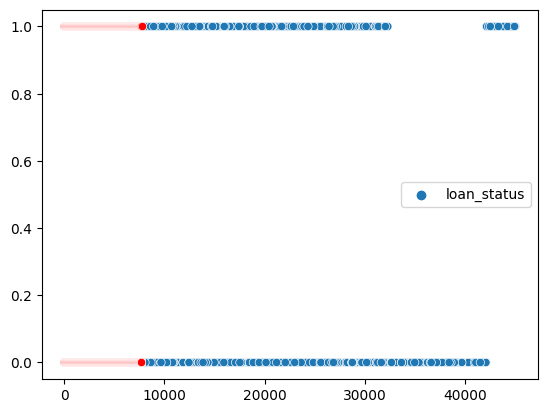

In [95]:
sns.scatterplot(y_test)
sns.scatterplot(y_pred,c='r')

In [97]:
# Predict on new data
new_predictions = xg.predict(X_test)
new_pred_proba = xg.predict_proba(X_test)
new_pred_proba

array([[0.5260286 , 0.47397143],
       [0.00901616, 0.99098384],
       [0.9623734 , 0.03762664],
       ...,
       [0.9102794 , 0.08972058],
       [0.8389161 , 0.16108386],
       [0.05258143, 0.9474186 ]], dtype=float32)

In [163]:
X_test[100:].head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate
41570,3,1,56197.0,2,0,15000.0,5,9.48
10423,4,3,34363.0,2,3,10000.0,1,10.28
872,3,3,28644.0,4,0,10000.0,4,11.01
18808,2,3,51451.0,7,3,1200.0,1,16.29
26983,1,4,145413.0,12,0,8850.0,3,10.99


In [182]:
y_test[100:].tail()

,loan_status
22995,0
10723,1
21189,0
32046,1
44933,1


In [102]:
#X_test
X_test.shape

(7709, 8)

In [103]:
#y_test
y_test.shape

(7709, 1)

In [175]:
# new_data_scale = scale.transform([[23.0,1,0,144405.0,1,0,8000.0,2]]) # 559
# new_data_scale
new_data = [2,1,49986.0,12,3,3000.0,0,15.28]
new_data = [1,1,49179.0,13,3,21000.0,5,19.41]
new_data = [2,1,72987.0,12,3,11390.0,4,11.03]
new_data = [3,3,135285.0,6,0,15000.0,1,11.69]
new_data = [3,4,32848.0,1,3,7000.0,1,9.21]
new_data = [3,1	,56197.0,2,0,15000.0,5,9.48]
new_data = [4,3,34363.0,2,3,10000.0,1,10.28]

In [176]:
xg.predict([new_data])

array([1])

In [177]:
# Predict probability scores for a new sample
xg.predict_proba([new_data])

array([[0.06222934, 0.93777066]], dtype=float32)

In [202]:
prob = xg.predict_proba([new_data])[0]
predicted_class = prob.argmax()
confidence = prob.max()

print("Predicted Class:", predicted_class)
print("Confidence:", confidence)


Predicted Class: 1
Confidence: 0.93777066


In [156]:
# Model Deployment using Flask:-
import pickle,joblib

In [169]:
with open('xgboost.pkl', 'wb') as model_file:
    pickle.dump(xg, model_file)

In [129]:
# ✅ Load the trained model
with open('xgboost.pkl', 'rb') as file:
    model = pickle.load(file)

In [178]:
model.predict([new_data])

array([1])

In [179]:
# Predict probability scores for a new sample
model.predict_proba([new_data])

array([[0.06222934, 0.93777066]], dtype=float32)

In [165]:
with open('xgboost.jb','wb') as model_file:
    joblib.dump(xg,model_file)

In [172]:
# ✅ Load the trained model
with open('xgboost.jb', 'rb') as file:
    m = pickle.load(file)

In [180]:
m.predict([new_data])

array([1])

In [181]:
# Predict probability scores for a new sample
m.predict_proba([new_data])

array([[0.06222934, 0.93777066]], dtype=float32)

In [186]:
y_test.shape

(7709, 1)

In [205]:
new_predictions.shape

(7709,)

In [201]:
y_test['loan_status']

19455    1
18300    1
41671    0
41132    0
41574    0
        ..
22995    0
10723    1
21189    0
32046    1
44933    1
Name: loan_status, Length: 7709, dtype: int64

In [210]:
# Make sure both are 1D arrays
# y_test1 = y_test.ravel()
# y_pred = new_predictions.ravel()

comparison_df = pd.DataFrame({
    'Actual': y_test.squeeze(),       # or y_test.values.ravel()
    'Predicted': new_predictions.squeeze()
})

proba = xg.predict_proba(X_test)[:, 1]  # Probability of class 1 (Approved)
comparison_df['Approved Probability'] = proba

proba = xg.predict_proba(X_test)[:, 0]  # Probability of class 0 (Not Approved)
comparison_df['Not Approved Probability'] = proba

print(comparison_df.head())

       Actual  Predicted  Approved Probability  Not Approved Probability
19455       1          0              0.473971                  0.526029
18300       1          1              0.990984                  0.009016
41671       0          0              0.037627                  0.962373
41132       0          0              0.086358                  0.913642
41574       0          0              0.257405                  0.742595


In [230]:
p = 0
a = 0 
a_p = 0 
a0_p = 0 
a1_p = 0
for index, row in comparison_df.iterrows():
    if row['Actual']==row['Predicted'] and row['Actual']==1:
        a += 1 
    elif row['Actual']==row['Predicted'] and row['Actual']==0:
        p += 1
    elif row['Actual']==1 and row['Predicted']==0:
        a1_p += 1 
    elif row['Actual']==0 and row['Predicted'] == 1:
        a0_p += 1
    else:
        a_p +=1 

a,p,a_p , a1_p , a0_p

(1273, 5436, 0, 433, 567)

In [231]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions) # TP + TN / All
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5436  567]
 [ 433 1273]]


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Predicted', ylabel='Approved Probability'>

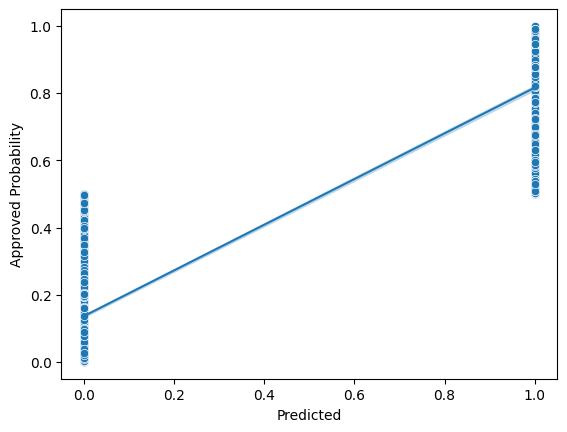

In [221]:
sns.scatterplot(x=comparison_df['Predicted'],y=comparison_df['Approved Probability'])
sns.lineplot(x=comparison_df['Predicted'],y=comparison_df['Approved Probability'])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Actual', ylabel='Approved Probability'>

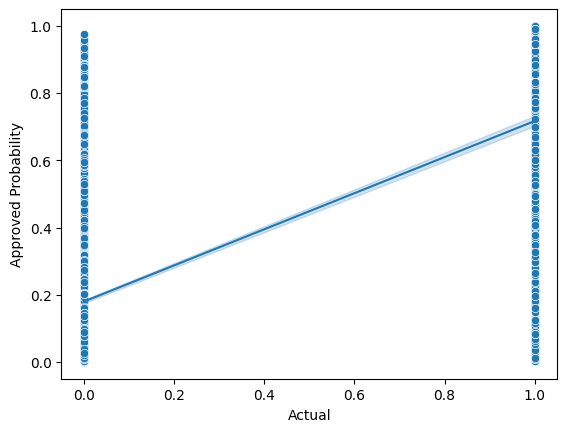

In [219]:
sns.scatterplot(x=comparison_df['Actual'],y=comparison_df['Approved Probability'])
sns.lineplot(x=comparison_df['Actual'],y=comparison_df['Approved Probability'])

# Actual vs Prediction Percentage:-

In [183]:
new_predictions[new_predictions==0].shape , new_predictions[new_predictions==1].shape

((5869,), (1840,))

In [185]:
y_test[y_test['loan_status']==0].shape , y_test[y_test['loan_status']==1].shape

((6003, 1), (1706, 1))

In [187]:
# Actual Percentage for True
actual_true= y_test[y_test['loan_status']==1].shape[0] / y_test.shape[0] * 100
actual_true

22.129977947853156

In [188]:
# Actual Percentage for false
actual_false=y_test[y_test['loan_status']==0].shape[0] / y_test.shape[0] * 100
actual_false

77.87002205214684

In [189]:
# Prediction Percentage for True
pred_true = new_predictions[new_predictions==1].shape[0] / new_predictions.shape[0] * 100
pred_true

23.8682059929952

In [190]:
# Prediction Percentage for False
pred_false =new_predictions[new_predictions==0].shape[0] / new_predictions.shape[0] * 100
pred_false

76.1317940070048

In [192]:
pred_true/actual_true * 100 , actual_true/pred_true * 100

(107.85463071512311, 92.71739130434781)

In [191]:
pred_false/actual_false * 100 , actual_false/pred_false * 100

(97.76778277527903, 102.28318282501276)

In [ ]:
# 🎯 Real-World Examples of Each Scenario
# Scenario	                              Bias    	Variance	     Example Model	                Description
# 1. High Train, Low Test Accuracy	❌ Low Bias	✅ High Variance	Unpruned Decision Trees, XGBoost with max_depth=15, n_estimators=1000	Learns too much, including noise — doesn't generalize
# 2. Low Train, Low Test Accuracy	✅ High Bias	❌ Low Variance	Logistic Regression on complex image data	Model too simple — misses key patterns
# 3. High Train, High Test Accuracy	✅ Low Bias	✅ Low Variance	Well-tuned Random Forest or XGBoost with early stopping	Learns enough without overfitting — generalizes well
# 4. Low Train, High Test Accuracy	❗ Rare	❗ Suspect	Data leakage, accidental feature leak	Model appears to do poorly in training but magically does well on test set — check your data pipeline!

## Using ML PipeLine:- 

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
# Create a pipeline with scaling and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    ))
])

In [67]:
# Perform cross-validated predictions on training data
cv_predictions_train = cross_val_predict(
    estimator=pipeline, 
    X=X_train, 
    y=y_train, 
    cv=kfold
)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

In [68]:
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_train, cv_predictions_train))
print("Precision (Macro):", precision_score(y_train, cv_predictions_train, average='macro'))
print("Recall (Macro):", recall_score(y_train, cv_predictions_train, average='macro'))
print("F1 Score (Macro):", f1_score(y_train, cv_predictions_train, average='macro'))

Cross-Validation Metrics on Training Data:
Accuracy: 0.87163647494226
Precision (Macro): 0.8694063636455398
Recall (Macro): 0.7389157877684448
F1 Score (Macro): 0.7780735411565687


In [69]:
# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_train, cv_predictions_train))


Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     27945
           1       0.87      0.50      0.63      7992

    accuracy                           0.87     35937
   macro avg       0.87      0.74      0.78     35937
weighted avg       0.87      0.87      0.86     35937



In [70]:
confusion_matrix(y_train, cv_predictions_train)

array([[27329,   616],
       [ 3997,  3995]], dtype=int64)

In [71]:
# Predict on test data
pipeline.fit(X_train, y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [72]:
# Predictions on test data
test_predictions = pipeline.predict(X_test)

In [73]:
print("\nTest Data Prediction Metrics:")
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Precision (Macro):", precision_score(y_test, test_predictions, average='macro'))
print("Recall (Macro):", recall_score(y_test, test_predictions, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, test_predictions, average='macro'))


Test Data Prediction Metrics:
Accuracy: 0.8718976071229827
Precision (Macro): 0.8711952228315631
Recall (Macro): 0.7372311881063646
F1 Score (Macro): 0.7769600226505036


In [74]:
print("\nDetailed Classification Report (Test Data):")
print(classification_report(y_test, test_predictions))


Detailed Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6995
           1       0.87      0.50      0.63      1990

    accuracy                           0.87      8985
   macro avg       0.87      0.74      0.78      8985
weighted avg       0.87      0.87      0.86      8985



In [75]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))


Confusion Matrix:
[[6848  147]
 [1004  986]]


In [76]:
# Feature Importance
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

In [77]:
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
                 Feature  Importance
3          person_income    0.376830
6              loan_amnt    0.245555
0             person_age    0.095315
4         person_emp_exp    0.086241
5  person_home_ownership    0.074642
7            loan_intent    0.063318
2       person_education    0.041315
1          person_gender    0.016784


In [78]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent
32402,52.0,0,3,43018.0,28,3,6000.0,4
28634,33.0,1,3,133080.0,11,3,10000.0,5
9200,24.0,0,0,72814.0,1,0,2800.0,5
38825,28.0,1,1,60893.0,3,0,20000.0,2
25175,32.0,1,0,48636.0,10,3,12000.0,0
...,...,...,...,...,...,...,...,...
28964,28.0,1,3,67987.0,5,0,8400.0,1
15383,23.0,1,0,144405.0,1,0,8000.0,2
14545,22.0,1,1,41670.0,3,3,15000.0,5
31190,36.0,1,3,41118.0,16,3,12000.0,1


In [79]:
y_test

,loan_status
32402,0
28634,0
9200,0
38825,0
25175,0
...,...
28964,0
15383,1
14545,1
31190,1


In [80]:
pipeline.predict([[23.0,1,0,144405.0,1,0,8000.0,2]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [81]:
pipeline.predict([[24.0,0,0,72814.0,1,0,2800.0,5]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [83]:
filepath='models/trained_model.pkl'

In [84]:
"""
Save trained model and scaler
"""
joblib.dump({
    'model': model,
    'pipeline': pipeline
}, filepath)

['models/trained_model.pkl']

In [87]:
predictor = joblib.load(filepath)
predictor

{'model': RandomForestClassifier(random_state=42),
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(random_state=42))])}

In [92]:
#predictor['model'].predict([[24.0,0,0,72814.0,1,0,2800.0,5]])
predictor['model'].predict([[23.0,1,0,144405.0,1,0,8000.0,2]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [93]:
#predictor['pipeline'].predict([[24.0,0,0,72814.0,1,0,2800.0,5]])
predictor['pipeline'].predict([[23.0,1,0,144405.0,1,0,8000.0,2]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [45]:
# 1. Basic Random Forest with L1/L2 Regularization
rf_l1_params = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.001, 0.01]  # Cost Complexity Pruning (built-in regularization)
}

In [46]:
# Create a pipeline with scaling and Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [47]:
# # GridSearchCV for hyperparameter tuning and regularization
# grid_search = GridSearchCV(
#     estimator=rf_pipeline,
#     param_grid={
#         'classifier__' + k: v for k, v in rf_l1_params.items()
#     },
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# # Fit GridSearch
# grid_search.fit(X_train, y_train)

# # Best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("Best Parameters:", best_params)
# print("Best Cross-validated Score:", grid_search.best_score_)

# Ensemble Regularization Techniques
# Combining multiple regularization approaches

In [1]:
# Bagging with different regularization parameters
def create_regularized_models():
    models = [
        RandomForestClassifier(
            n_estimators=100,
            max_depth=depth,
            min_samples_split=split,
            min_samples_leaf=leaf,
            max_features=features,
            random_state=42
        )
        for depth in [None, 10, 20,30]
        for split in [2, 5, 10]
        for leaf in [1, 2,4]
        for features in ['sqrt', 'log2']
    ]
    return models


In [31]:
# Voting Classifier for ensemble regularization
from sklearn.ensemble import VotingClassifier

In [32]:
# Create an ensemble of regularized models
ensemble_models = create_regularized_models()
voting_classifier = VotingClassifier(
    estimators=[(f'model_{i}', model) for i, model in enumerate(ensemble_models)],
    voting='soft'
)

In [33]:
# Fit and evaluate voting classifier
voting_classifier.fit(X_train, y_train)
voting_score = voting_classifier.score(X_test, y_test)
print("\nEnsemble Voting Classifier Score:", voting_score)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



Ensemble Voting Classifier Score: 0.8750139120756817


In [34]:
y_pred = voting_classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred) # TP + TN / All
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6907   88]
 [1035  955]]


In [37]:
# 3. Feature Selection with Regularization
from sklearn.feature_selection import SelectFromModel

In [38]:
# Feature selection with L1 regularization
selector = SelectFromModel(
    RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        random_state=42
    ), 
    prefit=False
)

In [41]:
# Create a pipeline with feature selection and classifier
feature_selection_pipeline = Pipeline([
    ('selector', selector),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [42]:
# Grid search with feature selection
feature_selection_grid = GridSearchCV(
    estimator=feature_selection_pipeline,
    param_grid={
        'selector__max_features': [None, 'sqrt', 'log2'],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    cv=5,
    scoring='accuracy'
)

In [43]:
feature_selection_grid.fit(X_train, y_train)
print("\nFeature Selection Best Score:", feature_selection_grid.best_score_)
print("Feature Selection Best Parameters:", feature_selection_grid.best_params_)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW


Feature Selection Best Score: 0.871274802189912
Feature Selection Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'selector__max_features': None}


In [ ]:
# Bonus: Regularization Performance Comparison
regularization_methods = {
    'Basic Random Forest': RandomForestClassifier(random_state=42),
    #'GridSearch Regularized': best_model,
    'Voting Ensemble': voting_classifier,
    'Feature Selection': feature_selection_grid.best_estimator_
}

In [ ]:
print("\nRegularization Method Comparison:")
for name, model in regularization_methods.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

In [96]:
X_test[100:]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,credit_score
38972,25.0,1,3,55184.0,4,3,12389.0,0,594
18971,29.0,1,1,128951.0,5,3,15000.0,0,570
10628,21.0,0,4,44152.0,0,3,10000.0,1,494
14526,26.0,0,0,131747.0,5,0,20000.0,0,541
3909,23.0,1,3,50147.0,1,3,4000.0,3,672
...,...,...,...,...,...,...,...,...,...
28964,28.0,1,3,67987.0,5,0,8400.0,1,611
15383,23.0,1,0,144405.0,1,0,8000.0,2,684
14545,22.0,1,1,41670.0,3,3,15000.0,5,585
31190,36.0,1,3,41118.0,16,3,12000.0,1,575


In [97]:
y_test[100:]

,loan_status
38972,0
18971,0
10628,0
14526,0
3909,0
...,...
28964,0
15383,1
14545,1
31190,1


In [ ]:
# X_test.index[33344]
# s = '24.0	0	4	65471.0	0	0	5000.0	1	639'
# print(s.strip().split(' '))

In [98]:
model.predict([[21.0,0,0,71339.0,0,0,5000.0,1,559]])

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

##   More Info:- 

In [ ]:
# # Set up k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=seed)  # 5 folds

# # Custom function to calculate multiple metrics
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# # Cross-validation loop
# for train_index, test_index in kf.split(X_train):
#     X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
#     # Train the model
#     model.fit(X_train_fold, y_train_fold)
    
#     # Predict on the validation fold
#     y_pred = model.predict(X_test_fold)
    
#     # Evaluate and store metrics
#     accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
#     precision_scores.append(precision_score(y_test_fold, y_pred, average='weighted'))
#     recall_scores.append(recall_score(y_test_fold, y_pred, average='weighted'))
#     f1_scores.append(f1_score(y_test_fold, y_pred, average='weighted'))

# # Display detailed results
# print("Cross-Validation Results:")
# print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
# print(f"Mean Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
# print(f"Mean Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
# print(f"Mean F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

In [ ]:
# # Train the model on the entire dataset
# model.fit(X_train, y_train)

# # Final evaluation on a test set (if available)
# y_test_pred = model.predict(X_test)
# final_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Final Test Accuracy: {final_accuracy:.4f}")